<a href="https://colab.research.google.com/github/TurchinskiyD/Retail_E-commerce_Sales_Analysis/blob/main/Retail_E_commerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# –ü—ñ–¥–∫–ª—é—á–µ–Ω–Ω—è –¥–æ google drive
from google.colab import drive
drive.mount("/content/drive")

# –ü–µ—Ä–µ—Ö—ñ–¥ –≤ —Ä–æ–±–æ—á—É –ø–∞–ø–∫—É
%cd /content/drive/MyDrive/Data_Analysis/Retail_E-commerce/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data_Analysis/Retail_E-commerce
countries.csv  events.csv  merged_sales_dataset.csv  products.csv


##**1. Data overview**

###*1.1 –î–∞—Ç–∞—Å–µ—Ç products*

In [74]:

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞—Ç–∞—Å–µ—Ç—É products
products_df = pd.read_csv('products.csv')
products_df.head()

id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

####**–û–ø–∏—Å —Ç–∞–±–ª–∏—Ü—ñ**
–¢–∞–±–ª–∏—Ü—è –≤–∏–º—ñ—Ä—ñ–≤ `products.csv`- –≤ —è–∫—ñ–π –∑–±–µ—Ä—ñ–≥–∞—é—Ç—å—Å—è –¥–∞–Ω—ñ –ø—Ä–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –ø—Ä–æ–¥–∞–≤–∞–Ω–∏—Ö —Ç–æ–≤–∞—Ä—ñ–≤
####–ö–æ–ª–æ–Ω–∫–∏:
- id ‚Äî —É–Ω—ñ–∫–∞–ª—å–Ω–∏–π –∫–æ–¥ —Ç–æ–≤–∞—Ä—É
- item_type ‚Äî –∫–∞—Ç–µ–≥–æ—Ä—ñ—è —Ç–æ–≤–∞—Ä—É (Cereal, Household, Clothes, ‚Ä¶)



###*1.2 –î–∞—Ç–∞—Å–µ—Ç countries*

In [75]:
# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞—Ç–∞—Å–µ—Ç—É countries
countries_df = pd.read_csv('countries.csv')
countries_df.head()

name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   √Öland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

####**–û–ø–∏—Å —Ç–∞–±–ª–∏—Ü—ñ**
–¢–∞–±–ª–∏—Ü—è –≤–∏–º—ñ—Ä—ñ–≤ `products.csv`- –≤ —è–∫—ñ–π –∑–±–µ—Ä—ñ–≥–∞—é—Ç—å—Å—è –¥–∞–Ω—ñ –ø—Ä–æ –∫—Ä–∞—ó–Ω–∏ –≤ —è–∫–∏—Ö –≤—ñ–¥–±—É–≤–∞–ª–∏—Å—è –ø—Ä–æ–¥–∞–∂—ñ.
####–ö–æ–ª–æ–Ω–∫–∏:
- name ‚Äî –Ω–∞–∑–≤–∞ –∫—Ä–∞—ó–Ω–∏
- alpha-2 ‚Äî 2-–ª—ñ—Ç–µ—Ä–Ω–∏–π –∫–æ–¥ –∫—Ä–∞—ó–Ω–∏ (ISO)
- alpha-3 ‚Äî 3-–ª—ñ—Ç–µ—Ä–Ω–∏–π –∫–æ–¥ –∫—Ä–∞—ó–Ω–∏ (ISO)
- region ‚Äî –º–∞–∫—Ä–æ—Ä–µ–≥—ñ–æ–Ω (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, Europe, Asia, Africa)
- sub-region ‚Äî –ø—ñ–¥—Ä–µ–≥—ñ–æ–Ω (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, Southern Asia, Northern Europe)

###*1.3 –î–∞—Ç–∞—Å–µ—Ç events*

In [76]:
# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞—Ç–∞—Å–µ—Ç—É events
events_df = pd.read_csv('events.csv')
events_df.head()

Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79

####**–û–ø–∏—Å —Ç–∞–±–ª–∏—Ü—ñ**
–¢–∞–±–ª–∏—Ü—è –ø–æ–¥—ñ–π `events.csv`- –≤ —è–∫—ñ–π –∑–±–µ—Ä—ñ–≥–∞—é—Ç—å—Å—è —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—è –ø—Ä–æ –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è –∫–æ–º–ø–∞–Ω—ñ—ó
####–ö–æ–ª–æ–Ω–∫–∏:
- Order ID ‚Äî —É–Ω—ñ–∫–∞–ª—å–Ω–∏–π —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ç–æ—Ä –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è
- Order Date ‚Äî –¥–∞—Ç–∞ –æ—Ñ–æ—Ä–º–ª–µ–Ω–Ω—è
- Ship Date ‚Äî –¥–∞—Ç–∞ –≤—ñ–¥–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è
- Order Priority ‚Äî –ø—Ä—ñ–æ—Ä–∏—Ç–µ—Ç –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è (L, M, H, C ‚Üí Low, Medium, High, Critical)
- Country Code ‚Äî –∫–æ–¥ –∫—Ä–∞—ó–Ω–∏ - –∫–ª—é—á–æ–≤–µ –ø–æ–ª–µ –¥–ª—è –∑—î–¥–Ω–∞–Ω–Ω—è –∑ —Ç–∞–±–ª–∏—Ü–µ—é `countries.csv` –∑–∞ –∫–æ–ª–æ–Ω–∫–æ—é **alpha-3**
- Product ID ‚Äî –∫–æ–¥ —Ç–æ–≤–∞—Ä—É - –∫–ª—é—á–æ–≤–µ –ø–æ–ª–µ –¥–ª—è –∑—î–¥–Ω–∞–Ω–Ω—è –∑ —Ç–∞–±–ª–∏—Ü–µ—é `products.csv` –∑–∞ –∫–æ–ª–æ–Ω–∫–æ—é **id**
- Sales Channel ‚Äî –∫–∞–Ω–∞–ª –ø—Ä–æ–¥–∞–∂—ñ–≤ (Online, Offline)
- Units Sold ‚Äî –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–Ω–∏—Ö –æ–¥–∏–Ω–∏—Ü—å
- Unit Price ‚Äî —Ü—ñ–Ω–∞ –∑–∞ –æ–¥–∏–Ω–∏—Ü—é
- Unit Cost ‚Äî —Å–æ–±—ñ–≤–∞—Ä—Ç—ñ—Å—Ç—å –æ–¥–∏–Ω–∏—Ü—ñ

##**2. Data cleaning**
–†–æ–±–æ—Ç–∞ —ñ–∑ –ø—Ä–æ–ø—É—â–µ–Ω–∏–º–∏ –¥–∞–Ω–∏–º–∏, –Ω–µ–∫–æ—Ä–µ–∫—Ç–Ω–∏–º–∏ –¥–∞–Ω–∏–º–∏, –∞–Ω–æ–º–∞–ª—ñ—è–º–∏.

###*2.1 –î–∞—Ç–∞—Å–µ—Ç products*

In [77]:
# –ü–µ—Ä–µ–≤—ñ—Ä–∏–º–æ –Ω–∞—è–≤–Ω—ñ—Å—Ç—å –ø—Ä–æ—à—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [78]:
# –ü–µ—Ä–µ–≤—ñ—Ä–∏–º–æ –Ω–∞—è–≤–Ω—ñ—Å—Ç—å –Ω–µ–∫–æ—Ä–µ–∫—Ç–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å
products_df['item_type'].unique()

array(['Cereal', 'Household', 'Clothes', 'Beverages', 'Office Supplies',
       'Fruits', 'Vegetables', 'Baby Food', 'Meat', 'Cosmetics', 'Snacks',
       'Personal Care'], dtype=object)

–¢–∞–±–ª–∏—Ü—è `products.csv` –∞–Ω–æ–º–∞–ª—ñ–π, –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å —á–∏ –Ω–µ–∫–æ—Ä–µ–∫—Ç–Ω–∏—Ö –¥–∞–Ω–∏—Ö –Ω–µ–º–∞—î

###*2.2 –î–∞—Ç–∞—Å–µ—Ç countries*

In [79]:
# –ü–µ—Ä–µ–≤—ñ—Ä–∏–º–æ –Ω–∞—è–≤–Ω—ñ—Å—Ç—å –ø—Ä–æ—à—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [80]:
countries_df[countries_df.isnull().any(axis=1)]

name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Africa

In [81]:
# –ó–∞–ø–æ–≤–Ω–∏–º–æ –ø—Ä–æ–ø—É—â–µ–Ω—ñ –¥–∞–Ω—ñ –¥–ª—è Antarctica
countries_df.loc[countries_df["alpha-3"] == "ATA", ["region", "sub-region"]] = ["Polar", "Antarctica"]

# –ó–∞–ø–æ–≤–Ω–∏–º–æ –ø—Ä–æ–ø—É—â–µ–Ω—ñ –¥–∞–Ω—ñ –¥–ª—è Namibia
countries_df.loc[countries_df["alpha-3"] == "NAM", "alpha-2"] = "NA"


In [82]:
countries_df[countries_df["alpha-3"].isin(["NAM", "ATA"])]

name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA   Polar          Antarctica
153     Namibia      NA     NAM  Africa  Sub-Saharan Africa

- –î–∂–µ—Ä–µ–ª–æ –¥–∞–Ω–∏—Ö –¥–ª—è Antarctica - [Wikipedia](https://uk.wikipedia.org/wiki/%D0%90%D0%BD%D1%82%D0%B0%D1%80%D0%BA%D1%82%D0%B8%D0%BA%D0%B0)

- –î–∂–µ—Ä–µ–ª–æ –¥–∞–Ω–∏—Ö –¥–ª—è Namibia - [Wikipedia](https://uk.wikipedia.org/wiki/ISO_3166-1)

In [83]:
print(countries_df.shape[0])
print(countries_df.drop_duplicates().shape[0])


249
249


–î–∞—Ç–∞—Ñ—Ä–µ–π–º `countries` –¥—É–±–ª—ñ–∫–∞—Ç—ñ–≤ –Ω–µ –º–∞—î

###*2.3 –î–∞—Ç–∞—Å–µ—Ç events*

In [84]:
events_df.head()

Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79

In [85]:
print(events_df.info())
print(events_df.isna().sum() / events_df.shape[0] * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
None
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64

In [86]:
events_df['Units Sold'].describe()

count    1328.000000
mean     4952.201807
std      2905.198996
min         2.000000
25%      2356.750000
50%      4962.000000
75%      7459.500000
max      9999.000000
Name: Units Sold, dtype: float64

–ú–∞—î–º–æ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–≤–æ—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö **Country Code** - 6.16% –∑–Ω–∞—á–µ–Ω—å, —Ç–∞ **Units Sold** - 0.15%.

–í—Ä–∞—Ö–æ–≤—É—é—á–∏ –¥—É–∂–µ –º–∞–ª—É –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫—ñ–≤ Units Sold –∑–∞–ø–æ–≤–Ω–∏–º–æ **—Å–µ—Ä–¥–Ω—ñ–º –∑–Ω–∞—á–µ–Ω–Ω—è–º** –¥–ª—è —Ü—ñ—î—ó –∫–æ–ª–æ–Ω–∫–∏ (–≤ –¥–∞–Ω–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—ñ —Å–µ—Ä–µ–¥–Ω—î —Ç–∞ –º–µ–¥—ñ–∞–Ω–Ω–µ –¥—É–∂–µ –±–ª–∏–∑—å–∫–æ –æ–¥–Ω–µ –¥–æ –æ–¥–Ω–æ–≥–æ 4952 —Ç–∞ 4962 –æ–¥–∏–Ω–∏—Ü—å).

–©–æ–¥–æ –∫–æ–¥—É –∫—Ä–∞—ó–Ω–∏ —Ö–æ—á–∞ 6.16% —Ü–µ —î –¥—É–∂–µ —Å—É—Ç—Ç—î–≤–æ, –æ–∫—Ä—ñ–º Country Code –Ω—ñ—è–∫–æ—ó —ñ–Ω—à–æ—ó —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—ó –≤ —Ç–∞–±–ª–∏—Ü—ñ events –ø—Ä–æ –Ω–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è –¥–æ —Ç—ñ—î—ó —ñ–Ω—à–æ—ó –∫—Ä–∞—ó–Ω–∏ –º–∏ –Ω–µ –º–∞—î–º–æ, —Ç–æ–∂ —Ü—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –∑–∞–ª–∏—à–∞—é—Ç—å—Å—è –Ω–µ–≤—ñ–¥–æ–º–∏–º–∏ "**Unknown**".

In [87]:
# –ó–∞–ø–æ–≤–Ω–∏–º–æ –ø—Ä–æ–ø—É—â–µ–Ω—ñ –¥–∞–Ω—ñ –¥–ª—è Units Sold
events_df['Units Sold'] = events_df['Units Sold'].fillna(events_df["Units Sold"].median())

# –ó–∞–ø–æ–≤–Ω–∏–º–æ –ø—Ä–æ–ø—É—â–µ–Ω—ñ –¥–∞–Ω—ñ –¥–ª—è Country Code
events_df["Country Code"] = events_df["Country Code"].fillna("UNK")


In [88]:
print(events_df.isna().sum() / events_df.shape[0] * 100)

Order ID          0.0
Order Date        0.0
Ship Date         0.0
Order Priority    0.0
Country Code      0.0
Product ID        0.0
Sales Channel     0.0
Units Sold        0.0
Unit Price        0.0
Unit Cost         0.0
dtype: float64


In [89]:
events_df[events_df['Country Code'] == "UNK"].head()

Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
2   101025998  7/18/2014  8/11/2014              M          UNK        7940   
13  104548490   1/1/2014   1/5/2014              M          UNK        7331   
26  117929494  1/24/2015   3/2/2015              H          UNK        4594   
29  118859469   6/2/2011   7/1/2011              L          UNK        8969   
43  126948583  5/24/2017   7/9/2017              C          UNK        7331   

   Sales Channel  Units Sold  Unit Price  Unit Cost  
2         Online      4693.0      668.27     502.54  
13        Online      7076.0      255.28     159.42  
26       Offline      6813.0        9.33       6.92  
29       Offline      2013.0      152.58      97.44  
43        Online      5762.0      255.28     159.42

In [90]:
#–î–æ–¥–∞–º–æ –∑–∞–ø–∏—Å –¥–æ countries_df
new_country = {
    "name": "Unknown",
    "alpha-2": "XX",
    "alpha-3": "UNK",
    "region": "Unknown",
    "sub-region": "Unknown"
}

new_country_df = pd.DataFrame([new_country])
countries_df = pd.concat([countries_df, new_country_df], ignore_index=True)

countries_df.tail()

name alpha-2 alpha-3   region          sub-region
245  Western Sahara      EH     ESH   Africa     Northern Africa
246           Yemen      YE     YEM     Asia        Western Asia
247          Zambia      ZM     ZMB   Africa  Sub-Saharan Africa
248        Zimbabwe      ZW     ZWE   Africa  Sub-Saharan Africa
249         Unknown      XX     UNK  Unknown             Unknown

–í –ø–æ–¥–∞–ª—å—à–æ–º—É –ø—Ä–∏ –∞–Ω–∞–ª—ñ–∑—ñ –≤ —Ä–æ–∑—Ä—ñ–∑—ñ –∫—Ä–∞—ó–Ω —á–∏ —Ä–µ–≥—ñ–æ–Ω—ñ–≤  –º–∞—Ç–∏–º–µ–º–æ –∑–∞–ø–æ–≤–Ω–µ–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è "Unknown"

In [91]:
# –ü–µ—Ä–µ–≤—ñ—Ä–∏–º–æ –Ω–∞ –Ω–∞—è–≤–Ω—ñ—Å—Ç—å –¥—É–±–ª—ñ–∫–∞—Ç—ñ–≤
duplicate_rows = events_df.duplicated()
duplicate_rows.sum()

np.int64(0)

–î—É–±–ª—ñ–∫–∞—Ç—ñ–≤ –Ω–µ–º–∞—î

–ü–µ—Ä–µ–≤—ñ—Ä–∏–º–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω—ñ—Å—Ç—å —Ç–∏–ø—ñ–≤ –∫–æ–ª–æ–Ω–æ–∫ –¥–æ –≤–Ω–µ—Å–µ–Ω–∏—Ö –¥–∞–Ω–∏—Ö

In [92]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1330 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1330 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


–ö–æ–ª–æ–Ω–∫–∏ `Ship Date` —Ç–∞ `Order Date` –º–∞—é—Ç—å —Ç–∏–ø **object** —ó—Ö –ø–æ—Ç—Ä—ñ–±–Ω–æ –ø–µ—Ä–µ—Ç–≤–æ—Ä–∏—Ç–∏ –Ω–∞ **datetime**. –†–µ—à—Ç–∞ –∫–æ–ª–æ–Ω–æ–∫ –º–∞—é—Ç—å –ø—ñ–¥—Ö–æ–¥—è—â–∏–π —Ñ–æ—Ä–º–∞—Ç

In [93]:

# –ü–æ–¥–∏–≤–∏–º–æ—Å—å –ø–µ—Ä—à—ñ 10 —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö –¥–∞—Ç
print(events_df['Order Date'].unique()[:10])
print(events_df['Ship Date'].unique()[:10])



['10/8/2014' '8/11/2016' '7/18/2014' '5/13/2017' '8/11/2012' '3/15/2015'
 '4/20/2013' '11/12/2011' '9/19/2012' '1/23/2011']
['10/18/2014' '8/11/2016' '8/11/2014' '6/13/2017' '9/18/2012' '4/18/2015'
 '6/6/2013' '12/14/2011' '10/20/2012' '2/22/2011']


In [94]:
# –ü–µ—Ä–µ–≤—ñ—Ä–∏–º–æ —á–∏ —î –∑–Ω–∞—á–µ–Ω–Ω—è > 12 –¥–ª—è –ø–µ—Ä—à–æ—ó —á–∞—Å—Ç–∏–Ω–∏ –¥–∞—Ç–∏
def check_date_format(series):
    first_parts = [d.split('/')[0] for d in series.dropna()]
    first_parts = [int(x) for x in first_parts if x.isdigit()]
    over_12 = [x for x in first_parts if x > 12]
    if over_12:
        print(f"–Ñ –∑–Ω–∞—á–µ–Ω–Ω—è '> 12' —É –ø–µ—Ä—à—ñ–π —á–∞—Å—Ç–∏–Ω—ñ –¥–∞—Ç–∏: {set(over_12)} - —Ñ–æ—Ä–º–∞—Ç DD/MM/YYYY")
    else:
        print("–ù–µ–º–∞—î –∑–Ω–∞—á–µ–Ω—å '> 12' —É –ø–µ—Ä—à—ñ–π —á–∞—Å—Ç–∏–Ω—ñ –¥–∞—Ç–∏: - —Ñ–æ—Ä–º–∞—Ç MM/DD/YYYY")

# –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ –¥–ª—è –∫–æ–ª–æ–Ω–æ–∫
check_date_format(events_df['Order Date'])
check_date_format(events_df['Ship Date'])


–ù–µ–º–∞—î –∑–Ω–∞—á–µ–Ω—å '> 12' —É –ø–µ—Ä—à—ñ–π —á–∞—Å—Ç–∏–Ω—ñ –¥–∞—Ç–∏: - —Ñ–æ—Ä–º–∞—Ç MM/DD/YYYY
–ù–µ–º–∞—î –∑–Ω–∞—á–µ–Ω—å '> 12' —É –ø–µ—Ä—à—ñ–π —á–∞—Å—Ç–∏–Ω—ñ –¥–∞—Ç–∏: - —Ñ–æ—Ä–º–∞—Ç MM/DD/YYYY


In [95]:
# –ü–µ—Ä–µ—Ç–≤–æ—Ä–∏–º–æ –∫–æ–ª–æ–Ω–∫–∏ 'Order Date' —Ç–∞	'Ship Date' –Ω–∞ datetime
events_df['Order Date'] = pd.to_datetime(events_df['Order Date'], format='%m/%d/%Y')

events_df['Ship Date'] = pd.to_datetime(events_df['Ship Date'], format='%m/%d/%Y')

In [96]:
events_df[['Order Date', 'Ship Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  1330 non-null   datetime64[ns]
 1   Ship Date   1330 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 20.9 KB


–ü–µ—Ä–µ–≤—ñ—Ä–∏–º–æ –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ –∞–Ω–æ–º–∞–ª—ñ—ó —Ç–∞ –∫–æ—Ä–µ–∫—Ç–Ω—ñ—Å—Ç—å –≤–Ω–µ—Å–µ–Ω–∏—Ö –¥–∞–Ω–∏—Ö

In [97]:
events_df[['Units Sold', 'Unit Cost', 'Unit Price']].describe()

Units Sold    Unit Cost   Unit Price
count  1330.000000  1330.000000  1330.000000
mean   4952.216541   187.246812   264.893541
std    2903.012194   176.158873   217.323460
min       2.000000     6.920000     9.330000
25%    2360.750000    35.840000    81.730000
50%    4962.000000    97.440000   154.060000
75%    7458.750000   263.330000   437.200000
max    9999.000000   524.960000   668.270000

–Ø–∫—â–æ –¥–ª—è `Units Sold` —Å–µ—Ä–µ–¥–Ω—î —Ç–∞ –º–µ–¥—ñ–∞–Ω–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è –º–∞–π–∂–µ –æ–¥–Ω–∞–∫–æ–≤–µ —Ç–æ –¥–ª—è `Unit Cost` —Ç–∞ `Unit Price` —Å–µ—Ä–µ–¥–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è –∑–Ω–∞—á–Ω–æ –±—ñ–ª—å—à–µ –Ω—ñ–∂ –º–µ–¥—ñ–∞–Ω–∞.

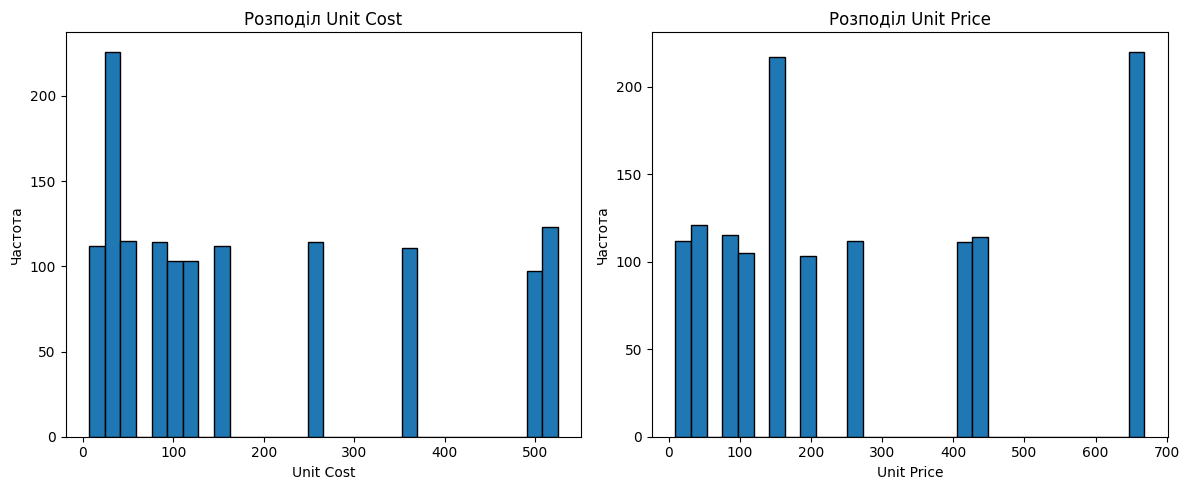

In [98]:
import matplotlib.pyplot as plt

# –ü–æ–±—É–¥—É—î–º–æ –≥—ñ—Å—Ç–æ–≥—Ä–∞–º–∏ –¥–ª—è Unit Cost —Ç–∞ Unit Price
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ Unit Cost
axes[0].hist(events_df['Unit Cost'], bins=30, edgecolor='black')
axes[0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª Unit Cost')
axes[0].set_xlabel('Unit Cost')
axes[0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ Unit Price
axes[1].hist(events_df['Unit Price'], bins=30, edgecolor='black')
axes[1].set_title('–†–æ–∑–ø–æ–¥—ñ–ª Unit Price')
axes[1].set_xlabel('Unit Price')
axes[1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

plt.tight_layout()
plt.show()



–ú–∞—î–º–æ —Å—É—Ç—Ç–µ–≤—ñ –≤–∏–∫–∏–¥–∏, –∞–ª–µ –≤—Ä–∞—Ö–æ–≤—É—é—á–∏, —â–æ —Ç–∞–∫–∏—Ö –∑–Ω–∞—á–µ–Ω—å –¥–æ—Å–∏—Ç—å –±–∞–≥–∞—Ç–æ, –∞ —Ç–∞–∫–æ–∂ —â–æ –∫–æ–º–ø–∞–Ω—ñ—è –ø—Ä–∞—Ü—é—î –∑ 12-—Ç–∏ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏ —Ç–æ–≤–∞—Ä—ñ–≤ –º–æ–∂–Ω–∞ –∑—Ä–æ–±–∏—Ç–∏ –ø–æ–ø–µ—Ä–¥–Ω—ñ–π –≤–∏—Å–Ω–æ–≤–æ–∫, —â–æ —Ü–µ –Ω–µ –∞–Ω–æ–º–∞–ª—å–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è - –∫–æ–º–ø–∞–Ω—ñ—è –∑–∞–π–º–∞—î —Ä—ñ–∑–Ω—ñ —Ü—ñ–Ω–æ–≤—ñ —Å–µ–≥–º–µ–Ω—Ç–∏ –Ω–∞ —Ä–∏–Ω–∫—É.

–ü–µ—Ä–µ–≤—ñ—Ä–∏–º–æ –∫–æ–ª–æ–Ω–∫–∏ –Ω–∞ –Ω–µ–∫–æ—Ä–µ–∫—Ç–Ω—ñ –¥–∞–Ω—ñ

In [99]:
print(events_df['Order Priority'].unique())
print(events_df['Sales Channel'].unique())
print(events_df['Country Code'].unique())

['M' 'C' 'L' 'H' ' C' 'M ']
['Online' 'Offline' 'online']
['NOR' 'SRB' 'UNK' 'MNE' 'SVK' 'FRA' 'ESP' 'HRV' 'DEU' 'ARM' 'GEO' 'GBR'
 'SVN' 'ROU' 'POL' 'LUX' 'CYP' 'BEL' 'LTU' 'RUS' 'MLT' 'UKR' 'CZE' 'PRT'
 'BLR' 'EST' 'AUT' 'MKD' 'SMR' 'NLD' 'CHE' 'HUN' 'LVA' 'BGR' 'ITA' 'IRL'
 'AND' 'LIE' 'FIN' 'ALB' 'SWE' 'BIH' 'DNK' 'MCO' 'ISL' 'GRC']


In [100]:
# –ü—Ä–∏–±–∏—Ä–∞—î–º–æ –ø—Ä–æ–±—ñ–ª–∏ —Ç–∞ –∑–≤–æ–¥–∏–º–æ –¥–æ –Ω–µ–æ–±—Ö—ñ–¥–Ω–æ–≥–æ —Ä–µ–≥—ñ—Å—Ç—Ä—É
events_df['Order Priority'] = events_df['Order Priority'].str.strip().str.upper()

events_df['Sales Channel'] = events_df['Sales Channel'].str.strip().str.capitalize()

events_df['Country Code'] = events_df['Country Code'].str.strip().str.upper()

In [101]:
print(events_df['Order Priority'].unique())
print(events_df['Sales Channel'].unique())
print(events_df['Country Code'].unique())

['M' 'C' 'L' 'H']
['Online' 'Offline']
['NOR' 'SRB' 'UNK' 'MNE' 'SVK' 'FRA' 'ESP' 'HRV' 'DEU' 'ARM' 'GEO' 'GBR'
 'SVN' 'ROU' 'POL' 'LUX' 'CYP' 'BEL' 'LTU' 'RUS' 'MLT' 'UKR' 'CZE' 'PRT'
 'BLR' 'EST' 'AUT' 'MKD' 'SMR' 'NLD' 'CHE' 'HUN' 'LVA' 'BGR' 'ITA' 'IRL'
 'AND' 'LIE' 'FIN' 'ALB' 'SWE' 'BIH' 'DNK' 'MCO' 'ISL' 'GRC']


–°—Ç–≤–æ—Ä–∏–º–æ –∫–æ–ª–æ–Ω–∫–∏ `Revenue`, `Cost`, `Profit`, `Markup` –Ω–µ–æ–±—Ö—ñ–¥–Ω—ñ –¥–ª—è –ø–æ–¥–∞–ª—å—à–æ–≥–æ –∞–Ω–∞–ª—ñ–∑—É

In [102]:
# –î–æ—Ö—ñ–¥
events_df['Revenue'] = events_df['Units Sold'] * events_df['Unit Price']

# –°–æ–±—ñ–≤–∞—Ä—Ç—ñ—Å—Ç—å
events_df['Cost'] = events_df['Units Sold'] * events_df['Unit Cost']

# –ü—Ä–∏–±—É—Ç–æ–∫
events_df['Profit'] = events_df['Revenue'] - events_df['Cost']

# –ù–∞—Ü—ñ–Ω–∫–∞ (%)
events_df['Markup'] = ((events_df['Unit Price'] - events_df['Unit Cost']) / events_df['Unit Cost']) * 100
events_df['Markup'] = events_df['Markup'].round(1)

events_df.head()

Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M          UNK        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost     Revenue        Cost  \
0        Online       650.0      205.70     117.11   133705.00    76121.50   
1       Offline      1993.0      205.70     117.11   409960.10   233400.23   
2        Online      4693.0      668.27     502.54  3136191.11  2358420.22   
3        Online      1171.0      109.28      35.84   127966.88    41968.64   
4       Offline      7648.0       47.45      31.79   362897.60   243129.92   

      Profit  Markup  
0   57583.50    75.6  
1  176559.87    75.6  
2  777770.89    33.0  
3   85998.24   204.9  
4  119767.68    49.3

–†–æ–∑—Ä–∞—Ö—É—î–º–æ —Ç–µ—Ä–º—ñ–Ω –¥–æ—Å—Ç–∞–≤–∫–∏ –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è —Ç–∞ –≤–Ω–µ—Å–µ–º–æ —Ü—ñ –¥–∞–Ω—ñ –≤ –æ–∫—Ä–µ–º—É –∫–æ–ª–æ–Ω–∫—É

In [103]:
events_df['Shipping Time'] = (events_df['Ship Date'] - events_df['Order Date']).dt.days
events_df.head()

Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M          UNK        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost     Revenue        Cost  \
0        Online       650.0      205.70     117.11   133705.00    76121.50   
1       Offline      1993.0      205.70     117.11   409960.10   233400.23   
2        Online      4693.0      668.27     502.54  3136191.11  2358420.22   
3        Online      1171.0      109.28      35.84   127966.88    41968.64   
4       Offline      7648.0       47.45      31.79   362897.60   243129.92   

      Profit  Markup  Shipping Time  
0   57583.50    75.6             10  
1  176559.87    75.6              0  
2  777770.89    33.0             24  
3   85998.24   204.9             31  
4  119767.68    49.3             38

In [104]:
events_df['Shipping Time'].describe()

count    1330.000000
mean       24.775940
std        14.577915
min         0.000000
25%        12.000000
50%        25.000000
75%        37.000000
max        50.000000
Name: Shipping Time, dtype: float64

–î–æ—Å—Ç–∞–≤–∫–∞ –≤—ñ–¥ 0 (–≤–∏–¥–∞—á–∞ –≤ –¥–µ–Ω—å –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è) –¥–æ 50 –¥–Ω—ñ–≤. –°–µ—Ä–µ–¥–Ω–µ 24.7 –º–µ–¥—ñ–∞–Ω–∞ 25 –æ—Ç–∂–µ –∞–Ω–æ–º–∞–ª—ñ–π —á–∏ –≤–∏–∫–∏–¥—ñ–≤ –Ω–µ –º–∞—î–º–æ

–í–∏–∑–Ω–∞—á–µ–º–æ –≤ —è–∫–∏–π –¥–µ–Ω—å —Ç–∏–∂–Ω—è –±—É–ª–æ –∑–¥—ñ–π—Å–Ω–µ–Ω–Ω–æ –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è

In [105]:

events_df['Order DayName'] = events_df['Order Date'].dt.day_name()
events_df['Order DayName'].unique()


array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

–í–∏–∑–Ω–∞—á–∏–º–æ –≤ —è–∫–∏–π —Ä—ñ–∫ —ñ –º—ñ—Å—è—Ü—å –±—É–ª–æ –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è

In [106]:
events_df['YearQuarter'] = events_df['Order Date'].dt.to_period('Q') \
                            .astype(str).str.replace('Q', '-Q')
events_df.head(2)


Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   

  Sales Channel  Units Sold  Unit Price  Unit Cost   Revenue       Cost  \
0        Online       650.0       205.7     117.11  133705.0   76121.50   
1       Offline      1993.0       205.7     117.11  409960.1  233400.23   

      Profit  Markup  Shipping Time Order DayName YearQuarter  
0   57583.50    75.6             10     Wednesday     2014-Q4  
1  176559.87    75.6              0      Thursday     2016-Q3

–û–±—î–¥–Ω–∞—î–º–æ 3 –¥–∞—Ç–∞—Å–µ—Ç–∏ –≤ 1 —Ç–∞ –ø—Ä–∏–±–µ—Ä–µ–º–æ –∑–∞–π–≤—ñ –ø–æ–ª—è


In [107]:
events_df.head(1)


Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   

  Sales Channel  Units Sold  Unit Price  Unit Cost   Revenue     Cost  \
0        Online       650.0       205.7     117.11  133705.0  76121.5   

    Profit  Markup  Shipping Time Order DayName YearQuarter  
0  57583.5    75.6             10     Wednesday     2014-Q4

In [108]:
products_df.head(1)

id item_type
0  2103    Cereal

In [109]:
countries_df.head(1)

name alpha-2 alpha-3 region     sub-region
0  Afghanistan      AF     AFG   Asia  Southern Asia

In [110]:

merged_df = events_df.merge(products_df, left_on='Product ID', right_on='id', how='left')
merged_df.head(2)


Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   

  Sales Channel  Units Sold  Unit Price  Unit Cost   Revenue       Cost  \
0        Online       650.0       205.7     117.11  133705.0   76121.50   
1       Offline      1993.0       205.7     117.11  409960.1  233400.23   

      Profit  Markup  Shipping Time Order DayName YearQuarter    id item_type  
0   57583.50    75.6             10     Wednesday     2014-Q4  2103    Cereal  
1  176559.87    75.6              0      Thursday     2016-Q3  2103    Cereal

In [111]:

merged_df = merged_df.merge(countries_df, left_on='Country Code', right_on='alpha-3', how='left')
merged_df.head(2)


Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   

  Sales Channel  Units Sold  Unit Price  Unit Cost  ...  Shipping Time  \
0        Online       650.0       205.7     117.11  ...             10   
1       Offline      1993.0       205.7     117.11  ...              0   

   Order DayName  YearQuarter    id  item_type    name alpha-2  alpha-3  \
0      Wednesday      2014-Q4  2103     Cereal  Norway      NO      NOR   
1       Thursday      2016-Q3  2103     Cereal  Serbia      RS      SRB   

   region       sub-region  
0  Europe  Northern Europe  
1  Europe  Southern Europe  

[2 rows x 24 columns]

–í–∏–¥–∞–ª–∏–º–æ –Ω–µ–ø–æ—Ç—Ä—ñ–±–Ω—ñ –∫–æ–ª–æ–Ω–∫–∏, —Ç–∞ –ø–µ—Ä–µ–π–º–µ–Ω—É—î–º–æ –¥–µ—è–∫—ñ —â–æ–± –Ω–∞–∑–≤–∏ –∫–æ–ª–æ–Ω–æ–∫ –±—É–ª–∏ –≤ –æ–¥–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—ñ

In [112]:

merged_df = merged_df.drop(
    columns=['Ship Date', 'Order Priority', 'Country Code', 'Product ID',
             'id', 'alpha-2', 'alpha-3', 'sub-region']
    )
merged_df.head(2)

Order ID Order Date Sales Channel  Units Sold  Unit Price  Unit Cost  \
0  100640618 2014-10-08        Online       650.0       205.7     117.11   
1  100983083 2016-08-11       Offline      1993.0       205.7     117.11   

    Revenue       Cost     Profit  Markup  Shipping Time Order DayName  \
0  133705.0   76121.50   57583.50    75.6             10     Wednesday   
1  409960.1  233400.23  176559.87    75.6              0      Thursday   

  YearQuarter item_type    name  region  
0     2014-Q4    Cereal  Norway  Europe  
1     2016-Q3    Cereal  Serbia  Europe

In [113]:
merged_df = merged_df.rename(columns={
    "item_type": "Product Category",
    "name": "Country",
    "region": "Region"
})
merged_df.head(2)

Order ID Order Date Sales Channel  Units Sold  Unit Price  Unit Cost  \
0  100640618 2014-10-08        Online       650.0       205.7     117.11   
1  100983083 2016-08-11       Offline      1993.0       205.7     117.11   

    Revenue       Cost     Profit  Markup  Shipping Time Order DayName  \
0  133705.0   76121.50   57583.50    75.6             10     Wednesday   
1  409960.1  233400.23  176559.87    75.6              0      Thursday   

  YearQuarter Product Category Country  Region  
0     2014-Q4           Cereal  Norway  Europe  
1     2016-Q3           Cereal  Serbia  Europe

–ó–±–µ—Ä–µ–∂–µ–º–æ –æ—á–∏—â–µ–Ω–∏–π –¥–∞—Ç–∞—Å–µ—Ç –≤ —Ñ–∞–π–ª

In [114]:

merged_df.to_csv('merged_sales_dataset.csv', index=False, encoding="utf-8", mode='w')


##**3. Data analysis and visualization**


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# –ü—ñ–¥–∫–ª—é—á–µ–Ω–Ω—è –¥–æ google drive
from google.colab import drive
drive.mount("/content/drive")

# –ü–µ—Ä–µ—Ö—ñ–¥ –≤ —Ä–æ–±–æ—á—É –ø–∞–ø–∫—É
%cd /content/drive/MyDrive/Data_Analysis/Retail_E-commerce/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data_Analysis/Retail_E-commerce


In [116]:
# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞—Ç–∞—Å–µ—Ç—É
sales_df = pd.read_csv('merged_sales_dataset.csv')
sales_df.head()

Order ID  Order Date Sales Channel  Units Sold  Unit Price  Unit Cost  \
0  100640618  2014-10-08        Online       650.0      205.70     117.11   
1  100983083  2016-08-11       Offline      1993.0      205.70     117.11   
2  101025998  2014-07-18        Online      4693.0      668.27     502.54   
3  102230632  2017-05-13        Online      1171.0      109.28      35.84   
4  103435266  2012-08-11       Offline      7648.0       47.45      31.79   

      Revenue        Cost     Profit  Markup  Shipping Time Order DayName  \
0   133705.00    76121.50   57583.50    75.6             10     Wednesday   
1   409960.10   233400.23  176559.87    75.6              0      Thursday   
2  3136191.11  2358420.22  777770.89    33.0             24        Friday   
3   127966.88    41968.64   85998.24   204.9             31      Saturday   
4   362897.60   243129.92  119767.68    49.3             38      Saturday   

  YearQuarter Product Category     Country   Region  
0     2014-Q4           Cereal      Norway   Europe  
1     2016-Q3           Cereal      Serbia   Europe  
2     2014-Q3        Household     Unknown  Unknown  
3     2017-Q2          Clothes  Montenegro   Europe  
4     2012-Q3        Beverages      Serbia   Europe

In [117]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1330 non-null   int64  
 1   Order Date        1330 non-null   object 
 2   Sales Channel     1330 non-null   object 
 3   Units Sold        1330 non-null   float64
 4   Unit Price        1330 non-null   float64
 5   Unit Cost         1330 non-null   float64
 6   Revenue           1330 non-null   float64
 7   Cost              1330 non-null   float64
 8   Profit            1330 non-null   float64
 9   Markup            1330 non-null   float64
 10  Shipping Time     1330 non-null   int64  
 11  Order DayName     1330 non-null   object 
 12  YearQuarter       1330 non-null   object 
 13  Product Category  1330 non-null   object 
 14  Country           1330 non-null   object 
 15  Region            1330 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory 

###**–ö–ª—é—á–æ–≤—ñ –º–µ—Ç—Ä–∏–∫–∏ –¥—ñ—è–ª—å–Ω–æ—Å—Ç—ñ –∫–æ–º–ø–∞–Ω—ñ—ó**

In [118]:

# –û—Å–Ω–æ–≤–Ω—ñ –º–µ—Ç—Ä–∏–∫–∏
total_orders = sales_df['Order ID'].count()
total_revenue = sales_df['Revenue'].sum().round()
total_cost = sales_df['Cost'].sum().round()
total_profit = sales_df['Profit'].sum().round()
max_order = sales_df['Revenue'].max()

# –ì–µ–æ–≥—Ä–∞—Ñ—ñ—á–Ω—ñ –º–µ—Ç—Ä–∏–∫–∏
unique_countries = sales_df['Country'].nunique()
top_countries_profit = sales_df.groupby('Country')['Profit'].sum() \
                          .round().sort_values(ascending=False).head(6)

# –ü—Ä–æ–¥—É–∫—Ç–æ–≤—ñ –º–µ—Ç—Ä–∏–∫–∏
unique_categories = sales_df['Product Category'].nunique()
top_categories_profit = sales_df.groupby('Product Category')['Profit'].sum() \
                        .round().sort_values(ascending=False).head(5)

# –§—ñ–Ω–∞–Ω—Å–æ–≤—ñ
avg_markup = sales_df['Markup'].mean().round(1)

# –û–ø–µ—Ä–∞—Ü—ñ–π–Ω—ñ
avg_shipping_time = sales_df['Shipping Time'].mean()
sales_channel_distribution = sales_df['Sales Channel'].value_counts(normalize=True) * 100
top_day = sales_df['Order DayName'].value_counts().idxmax()


In [119]:
# --- –í–∏–≤—ñ–¥ ---
print("üìä –û—Å–Ω–æ–≤–Ω—ñ –º–µ—Ç—Ä–∏–∫–∏")
print(f"–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–º–æ–≤–ª–µ–Ω—å: {total_orders:,}")
print(f"–ó–∞–≥–∞–ª—å–Ω–∏–π –¥–æ—Ö—ñ–¥: {total_revenue:,.2f}")
print(f"–ó–∞–≥–∞–ª—å–Ω–∞ —Å–æ–±—ñ–≤–∞—Ä—Ç—ñ—Å—Ç—å: {total_cost:,.2f}")
print(f"–ó–∞–≥–∞–ª—å–Ω–∏–π –ø—Ä–∏–±—É—Ç–æ–∫: {total_profit:,.2f}")
print(f"–ù–∞–π–±—ñ–ª—å—à–µ –∑–∞ –æ–±'—î–º–æ–º –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è: {max_order:,.2f}\n")

print("üåç –ì–µ–æ–≥—Ä–∞—Ñ—ñ—è")
print(f"–ö—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö –∫—Ä–∞—ó–Ω: {unique_countries}")
print("–¢–û–ü-5 –∫—Ä–∞—ó–Ω –∑–∞ –ø—Ä–∏–±—É—Ç–∫–æ–º:")
print(top_countries_profit, "\n")

print("üì¶ –ü—Ä–æ–¥—É–∫—Ç–∏")
print(f"–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤: {unique_categories}")
print("–¢–û–ü-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –∑–∞ –ø—Ä–∏–±—É—Ç–∫–æ–º (Profit):")
print(top_categories_profit, "\n")

print("üìà –§—ñ–Ω–∞–Ω—Å–∏")
print(f"–°–µ—Ä–µ–¥–Ω—è –Ω–∞—Ü—ñ–Ω–∫–∞: {avg_markup:.2f}% \n")

print("üöö –û–ø–µ—Ä–∞—Ü—ñ–π–Ω—ñ –º–µ—Ç—Ä–∏–∫–∏")
print(f"–°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏: {avg_shipping_time:.1f} –¥–Ω—ñ–≤")
print("–†–æ–∑–ø–æ–¥—ñ–ª –∑–∞–º–æ–≤–ª–µ–Ω—å –∑–∞ –∫–∞–Ω–∞–ª–∞–º–∏ –ø—Ä–æ–¥–∞–∂—É (%):")
print(sales_channel_distribution, "\n")
print(f"–ù–∞–π–±—ñ–ª—å—à –ø–æ–ø—É–ª—è—Ä–Ω–∏–π –¥–µ–Ω—å –∑–∞–º–æ–≤–ª–µ–Ω—å: {top_day}")

üìä –û—Å–Ω–æ–≤–Ω—ñ –º–µ—Ç—Ä–∏–∫–∏
–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–º–æ–≤–ª–µ–Ω—å: 1,330
–ó–∞–≥–∞–ª—å–Ω–∏–π –¥–æ—Ö—ñ–¥: 1,704,628,371.00
–ó–∞–≥–∞–ª—å–Ω–∞ —Å–æ–±—ñ–≤–∞—Ä—Ç—ñ—Å—Ç—å: 1,202,785,738.00
–ó–∞–≥–∞–ª—å–Ω–∏–π –ø—Ä–∏–±—É—Ç–æ–∫: 501,842,633.00
–ù–∞–π–±—ñ–ª—å—à–µ –∑–∞ –æ–±'—î–º–æ–º –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è: 6,672,675.95

üåç –ì–µ–æ–≥—Ä–∞—Ñ—ñ—è
–ö—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö –∫—Ä–∞—ó–Ω: 46
–¢–û–ü-5 –∫—Ä–∞—ó–Ω –∑–∞ –ø—Ä–∏–±—É—Ç–∫–æ–º:
Country
Unknown       27725424.0
Andorra       15410037.0
Ukraine       14804926.0
Malta         14610128.0
San Marino    13792993.0
Hungary       13786231.0
Name: Profit, dtype: float64 

üì¶ –ü—Ä–æ–¥—É–∫—Ç–∏
–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤: 12
–¢–û–ü-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –∑–∞ –ø—Ä–∏–±—É—Ç–∫–æ–º (Profit):
Product Category
Cosmetics          92723306.0
Office Supplies    77977176.0
Household          72962467.0
Baby Food          53940997.0
Clothes            43431314.0
Name: Profit, dtype: float64 

üìà –§—ñ–Ω–∞–Ω—Å

###**–ê–Ω–∞–ª—ñ–∑ –ø—Ä–æ–¥–∞–∂—ñ–≤**


####*–ü—Ä–æ–¥–∞–∂—ñ –≤ —Ä–æ–∑—Ä—ñ–∑—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤*

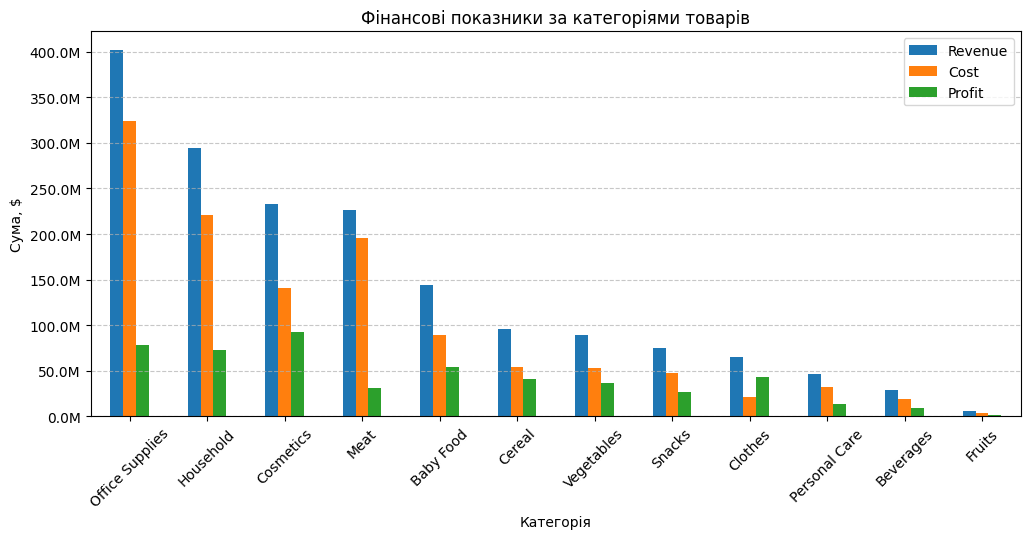

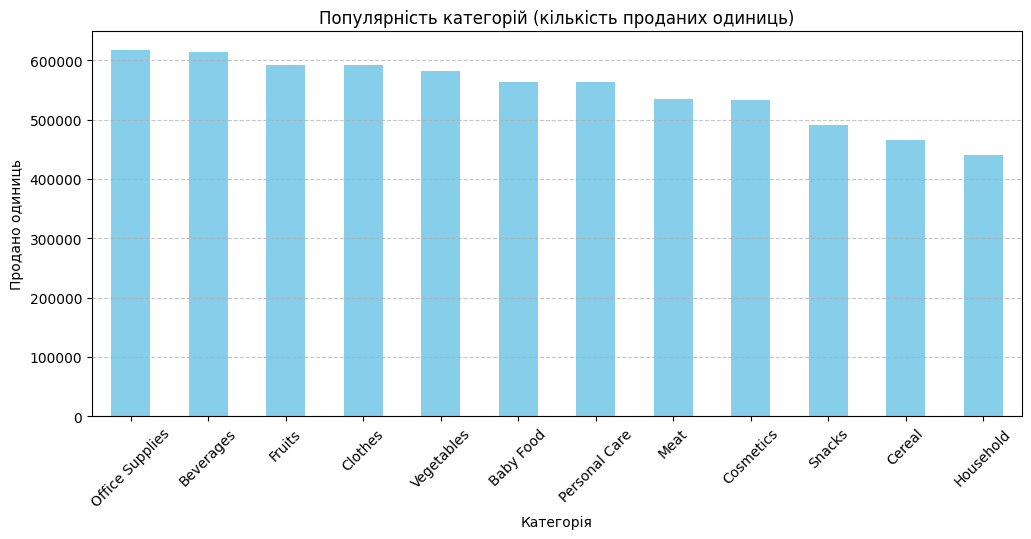

In [120]:
import matplotlib.ticker as ticker

# –ì—Ä—É–ø—É–≤–∞–Ω–Ω—è
category_stats = sales_df.groupby('Product Category')[['Revenue', 'Cost', 'Profit']] \
                .sum().sort_values('Revenue', ascending=False)

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –¥–æ—Ö–æ–¥—ñ–≤, –≤–∏—Ç—Ä–∞—Ç —ñ –ø—Ä–∏–±—É—Ç–∫—ñ–≤
ax = category_stats.plot(kind="bar", figsize=(12,5))
plt.title('–§—ñ–Ω–∞–Ω—Å–æ–≤—ñ –ø–æ–∫–∞–∑–Ω–∏–∫–∏ –∑–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏ —Ç–æ–≤–∞—Ä—ñ–≤')
plt.xlabel('–ö–∞—Ç–µ–≥–æ—Ä—ñ—è')
plt.ylabel('–°—É–º–∞, $')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# —Ñ–æ—Ä–º—É–≤–∞–Ω–Ω—è –º–ª–Ω $
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.show()

# –ü–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å (–∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–Ω–∏—Ö –æ–¥–∏–Ω–∏—Ü—å)
units_by_category = sales_df.groupby('Product Category')['Units Sold'].sum() \
                    .sort_values(ascending=False)

units_by_category.plot(kind='bar', figsize=(12,5), color='skyblue')
plt.title('–ü–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å –∫–∞—Ç–µ–≥–æ—Ä—ñ–π (–∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–Ω–∏—Ö –æ–¥–∏–Ω–∏—Ü—å)')
plt.ylabel('–ü—Ä–æ–¥–∞–Ω–æ –æ–¥–∏–Ω–∏—Ü—å')
plt.xlabel('–ö–∞—Ç–µ–≥–æ—Ä—ñ—è')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


####*–ü—Ä–æ–¥–∞–∂—ñ –≤ —Ä–æ–∑—Ä—ñ–∑—ñ –≥–µ–æ–≥—Ä–∞—Ñ—ñ—ó.*

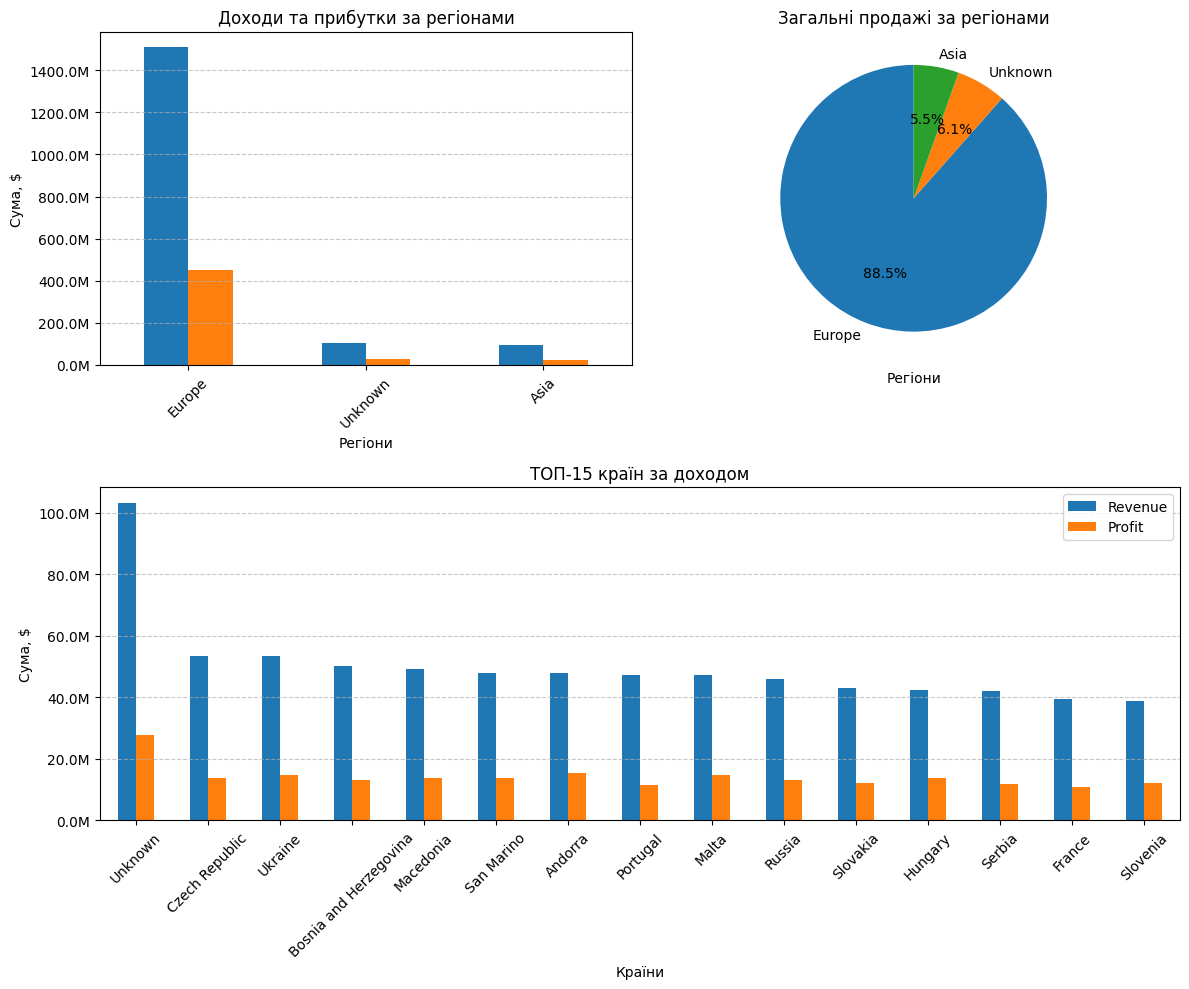

In [121]:

# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# fig.delaxes(axes[1,1])

fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0,0])   # –≤–µ—Ä—Ö–Ω—ñ–π –ª—ñ–≤–∏–π
ax2 = fig.add_subplot(gs[0,1])   # –≤–µ—Ä—Ö–Ω—ñ–π –ø—Ä–∞–≤–∏–π
ax3 = fig.add_subplot(gs[1,:])   # –Ω–∏–∂–Ω—ñ–π, —Ä–æ–∑—Ç—è–≥–Ω—É—Ç–∏–π –Ω–∞ 2 –∫–æ–ª–æ–Ω–∫–∏


# –î–æ—Ö–æ–¥–∏ –∑–∞ —Ä–µ–≥—ñ–æ–Ω–∞–º–∏
region_stats = sales_df.groupby('Region')[['Revenue', 'Profit']].sum() \
              .sort_values('Revenue', ascending=False)

ax1 = region_stats.plot(kind='bar', ax=ax1, legend=False)
ax1.set_title('–î–æ—Ö–æ–¥–∏ —Ç–∞ –ø—Ä–∏–±—É—Ç–∫–∏ –∑–∞ —Ä–µ–≥—ñ–æ–Ω–∞–º–∏')
ax1.set_xlabel('–†–µ–≥—ñ–æ–Ω–∏')
ax1.set_ylabel('–°—É–º–∞, $')
# —Ñ–æ—Ä–º—É–≤–∞–Ω–Ω—è –º–ª–Ω $
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)


# –ó–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ –∑–∞ —Ä–µ–≥—ñ–æ–Ω–∞–º–∏
region_stats['Revenue'].plot(
    kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90
    )
ax2.set_title('–ó–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ –∑–∞ —Ä–µ–≥—ñ–æ–Ω–∞–º–∏')
ax2.set_xlabel('–†–µ–≥—ñ–æ–Ω–∏')
ax2.set_ylabel('')


# –î–æ—Ö–æ–¥–∏ –∑–∞ –∫—Ä–∞—ó–Ω–∞–º–∏ (—Ç–æ–ø-10)
country_stats = sales_df.groupby('Country')[['Revenue', 'Profit']].sum(). \
                sort_values('Revenue', ascending=False).head(15)

ax3 = country_stats.plot(kind='bar', ax=ax3)
ax3.set_title('–¢–û–ü-15 –∫—Ä–∞—ó–Ω –∑–∞ –¥–æ—Ö–æ–¥–æ–º')
ax3.set_xlabel('–ö—Ä–∞—ó–Ω–∏')
ax3.set_ylabel('–°—É–º–∞, $')
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


####*–ü—Ä–æ–¥–∞–∂—ñ –≤ —Ä–æ–∑—Ä—ñ–∑—ñ –∫–∞–Ω–∞–ª—ñ–≤ –ø—Ä–æ–¥–∞–∂—É.*

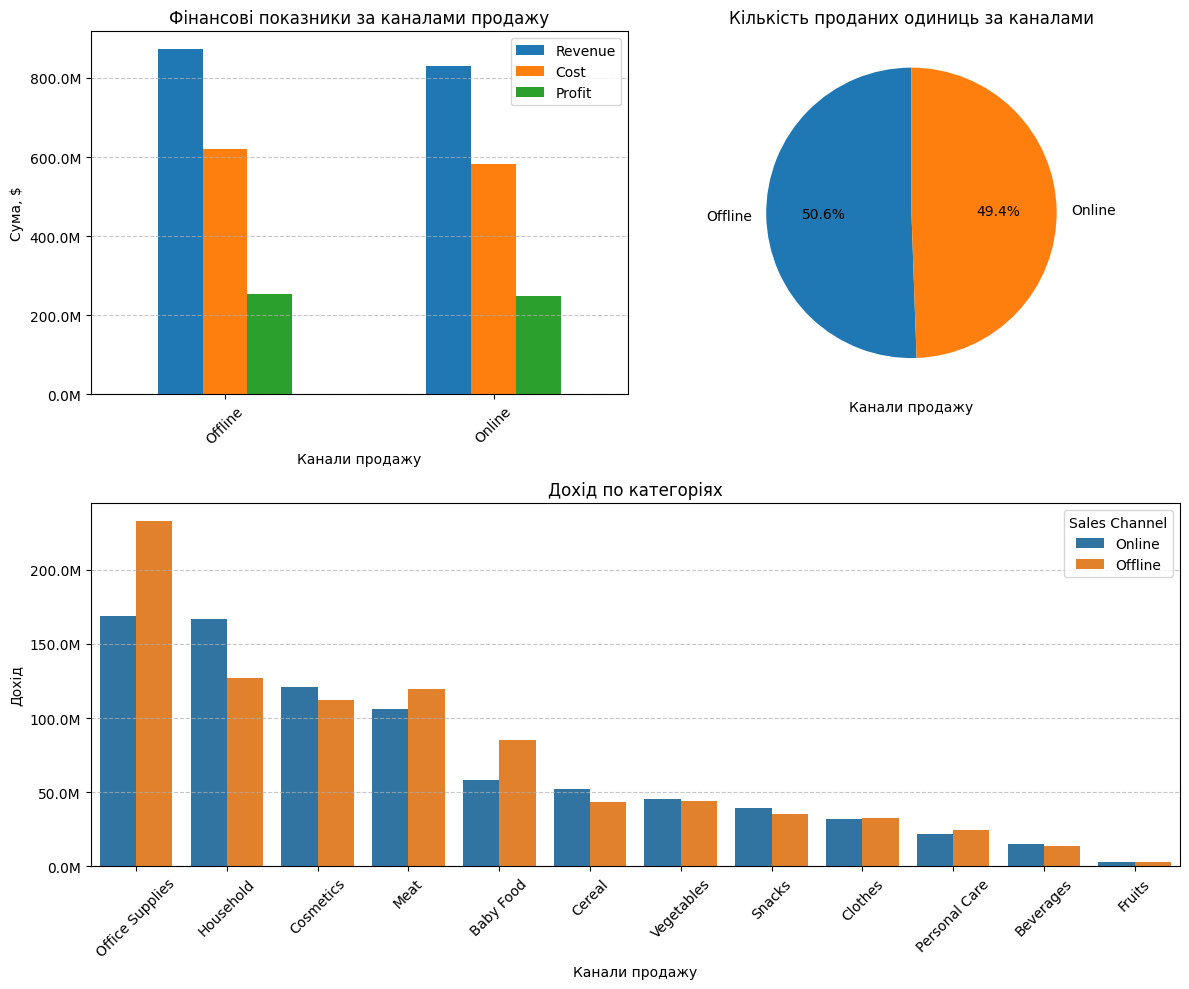

In [122]:

fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,:])


# –û—Å–Ω–æ–≤–Ω—ñ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–∞–Ω–∞–ª–∞–º
channel_stats = sales_df.groupby("Sales Channel")[["Revenue", "Cost", "Profit"]].sum()

channel_stats.plot(kind="bar", ax=ax1)
ax1.set_title("–§—ñ–Ω–∞–Ω—Å–æ–≤—ñ –ø–æ–∫–∞–∑–Ω–∏–∫–∏ –∑–∞ –∫–∞–Ω–∞–ª–∞–º–∏ –ø—Ä–æ–¥–∞–∂—É")
ax1.set_xlabel('–ö–∞–Ω–∞–ª–∏ –ø—Ä–æ–¥–∞–∂—É')
ax1.set_ylabel("–°—É–º–∞, $")
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)


# –ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–Ω–∏—Ö –æ–¥–∏–Ω–∏—Ü—å –ø–æ –∫–∞–Ω–∞–ª–∞–º
units_by_channel = sales_df.groupby("Sales Channel")["Units Sold"].sum()
units_by_channel.plot(
    kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90
    )
ax2.set_title("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–Ω–∏—Ö –æ–¥–∏–Ω–∏—Ü—å –∑–∞ –∫–∞–Ω–∞–ª–∞–º–∏")
ax2.set_xlabel('–ö–∞–Ω–∞–ª–∏ –ø—Ä–æ–¥–∞–∂—É')
ax2.set_ylabel("")


# –î–æ—Ö—ñ–¥ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö –≤ —Ä–æ–∑—Ä—ñ–∑—ñ –∫–∞–Ω–∞–ª—ñ–≤ –ø—Ä–æ–¥–∞–∂—É

order = sales_df.groupby('Product Category')['Revenue'].sum() \
        .sort_values(ascending=False).index


ax3 = sns.barplot(
    data=sales_df, ax=ax3,
    x='Product Category', y="Revenue", hue="Sales Channel", estimator="sum",
    errorbar=None, order=order
)
ax3.set_title("–î–æ—Ö—ñ–¥ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö")
ax3.set_xlabel('–ö–∞–Ω–∞–ª–∏ –ø—Ä–æ–¥–∞–∂—É')
ax3.set_ylabel("–î–æ—Ö—ñ–¥")
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##**–í–∏—Å–Ω–æ–≤–∫–∏**
***1. –ì–µ–æ–≥—Ä–∞—Ñ—ñ—è –ø—Ä–æ–¥–∞–∂—ñ–≤***
 - –Ñ–≤—Ä–æ–ø–∞ –≥–µ–Ω–µ—Ä—É—î –±—ñ–ª—è 90% –¥–æ—Ö–æ–¥—ñ–≤ - –∫–æ–º–ø–∞–Ω—ñ—è –∫—Ä–∏—Ç–∏—á–Ω–æ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ —Ü—å–æ–≥–æ —Ä–∏–Ω–∫—É - —Ä–∏–∑–∏–∫ –≤—ñ–¥ –∫–æ–ª–∏–≤–∞–Ω—å –µ–∫–æ–Ω–æ–º—ñ–∫–∏/–ø–æ–ª—ñ—Ç–∏–∫–∏.
- –ê–∑—ñ—è —Ç–∞ ‚ÄúUnknown‚Äù –º–∞—é—Ç—å –º–∞–ª—ñ —á–∞—Å—Ç–∫–∏ –±—ñ–ª—è 12% —Ä–∞–∑–æ–º.
- –°–µ—Ä–µ–¥ –¢–û–ü-–∫—Ä–∞—ó–Ω: Czech Republic, Ukraine, Bosnia and Herzegovina, Macedonia, San Marino, Andorra.
- –ü–æ—Ç—Ä—ñ–±–Ω–∞ –¥–∏–≤–µ—Ä—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—è —É –Ω–æ–≤—ñ —Ä–∏–Ω–∫–∏.
- –û–±–æ–≤‚Äô—è–∑–∫–æ–≤–æ –Ω–µ–æ–±—Ö—ñ–¥–Ω–æ —É—Å—É–Ω—É—Ç–∏ ‚ÄúUnknown‚Äù –æ—Å–∫—ñ–ª—å–∫–∏ –Ω–∞—Ä–∞–∑—ñ 6% –Ω–∞–¥—Ö–æ–¥–∂–µ–Ω –∫–æ–º–ø–∞–Ω—ñ—ó –Ω–µ –º–æ–∂—É—Ç—å –±—É—Ç–∏ —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–æ–≤–∞–Ω–∏–º–∏

***2. –ö–∞—Ç–µ–≥–æ—Ä—ñ—ó —Ç–æ–≤–∞—Ä—ñ–≤***
- –õ—ñ–¥–µ—Ä–∏ –∑–∞ –¥–æ—Ö–æ–¥–∞–º–∏: Office Supplies, Household, Cosmetics, Meat. –°–µ—Ä–µ–¥–Ω—è –≥—Ä—É–ø–∞: Baby Food, Cereal, Vegetables.
- –ù–∞–π–±—ñ–ª—å—à –≤–∏–≥—ñ–¥–Ω—ñ: Office Supplies —Ç–∞ Cosmetics.
Household —ñ Meat –ø—Ä–∏–Ω–æ—Å—è—Ç—å –∑–Ω–∞—á–Ω–∏–π –¥–æ—Ö—ñ–¥, –∞–ª–µ –º–∞—é—Ç—å –Ω–∏–∂—á—É —Ä–µ–Ω—Ç–∞–±–µ–ª—å–Ω—ñ—Å—Ç—å (–≤–∏—Å–æ–∫—ñ –≤–∏—Ç—Ä–∞—Ç–∏).
- Fruits —ñ Beverages ‚Üí –≤–∏—Å–æ–∫—ñ –æ–±—Å—è–≥–∏, –∞–ª–µ –Ω–∏–∑—å–∫–∞ –º–∞—Ä–∂–∞ (—Ç–æ–≤–∞—Ä–∏ –º–∞—Å–æ–≤–æ–≥–æ –ø–æ–ø–∏—Ç—É).
- –ù–∞–π–±—ñ–ª—å—à–µ –ø—Ä–æ–¥–∞—î—Ç—å—Å—è: Office Supplies, Beverages, Fruits, Clothes.
Household –ø—Ä–æ–¥–∞—î—Ç—å—Å—è –º–∞–ª–æ, –∞–ª–µ –ø—Ä–∏–Ω–æ—Å–∏—Ç—å –≤–µ–ª–∏–∫—ñ –≥—Ä–æ—à—ñ (–≤–∏—Å–æ–∫–∞ —Ü—ñ–Ω–∞ –∑–∞ –æ–¥–∏–Ω–∏—Ü—é).

***3. –ö–∞–Ω–∞–ª–∏ –ø—Ä–æ–¥–∞–∂—É***

- –ü—Ä–æ–¥–∞–∂—ñ —Ä–æ–∑–ø–æ–¥—ñ–ª–µ–Ω—ñ –º–∞–π–∂–µ –ø–æ—Ä—ñ–≤–Ω—É: 50.6% - Offline —ñ 49.4% - Online.
- Online —ñ Offline –º–∞—é—Ç—å –±–ª–∏–∑—å–∫—ñ –æ–±—Å—è–≥–∏ –¥–æ—Ö–æ–¥—É.
- Offline —Ç—Ä–æ—Ö–∏ –≤–∏–ø–µ—Ä–µ–¥–∂–∞—î –∑–∞ –ø—Ä–∏–±—É—Ç–∫–æ–º.

–ü–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö:  
- Household, Office Supplies, Meat –±—ñ–ª—å—à–µ –ø—Ä–æ–¥–∞—é—Ç—å—Å—è –æ—Ñ–ª–∞–π–Ω.
- Cosmetics, Baby Food, Snacks ‚Äî –±—ñ–ª—å—à —Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω–æ —Ä–æ–∑–ø–æ–¥—ñ–ª–µ–Ω—ñ.
- –î–µ—è–∫—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –∫—Ä–∞—â–µ —Ä–æ–∑–≤–∏–≤–∞—é—Ç—å—Å—è –æ–Ω–ª–∞–π–Ω (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, Personal Care).


###**–î–æ—Å–ª—ñ–¥–∂–µ–Ω–Ω—è –≤–ø–ª–∏–≤—É —ñ–Ω—Ç–µ—Ä–≤–∞–ª—É —á–∞—Å—É –º—ñ–∂ –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è–º —Ç–∞ –π–æ–≥–æ –≤—ñ–¥–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è–º**

In [123]:
sales_df.head(2)

Order ID  Order Date Sales Channel  Units Sold  Unit Price  Unit Cost  \
0  100640618  2014-10-08        Online       650.0       205.7     117.11   
1  100983083  2016-08-11       Offline      1993.0       205.7     117.11   

    Revenue       Cost     Profit  Markup  Shipping Time Order DayName  \
0  133705.0   76121.50   57583.50    75.6             10     Wednesday   
1  409960.1  233400.23  176559.87    75.6              0      Thursday   

  YearQuarter Product Category Country  Region  
0     2014-Q4           Cereal  Norway  Europe  
1     2016-Q3           Cereal  Serbia  Europe

####*–ê–Ω–∞–ª—ñ–∑ –≤ —Ä–æ–∑—Ä—ñ–∑—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤*

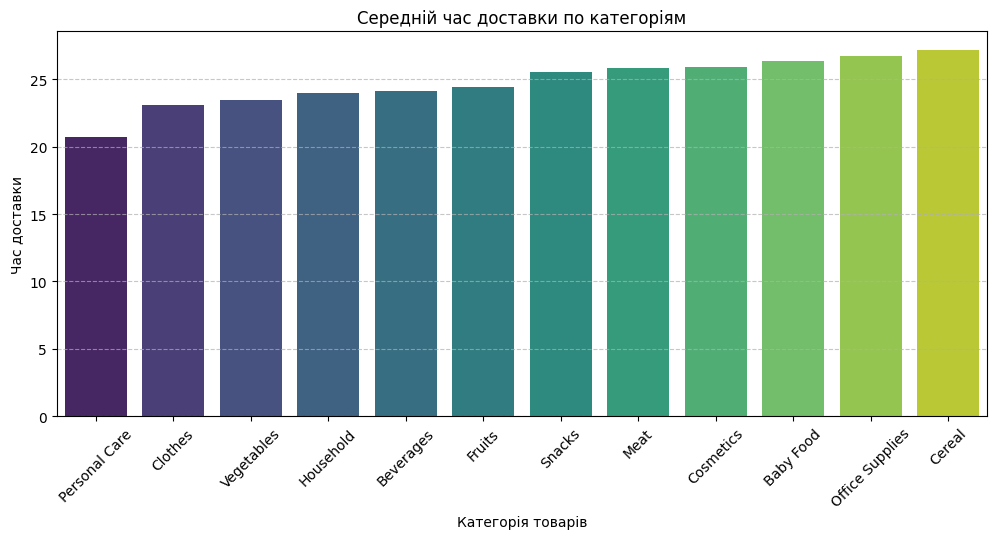

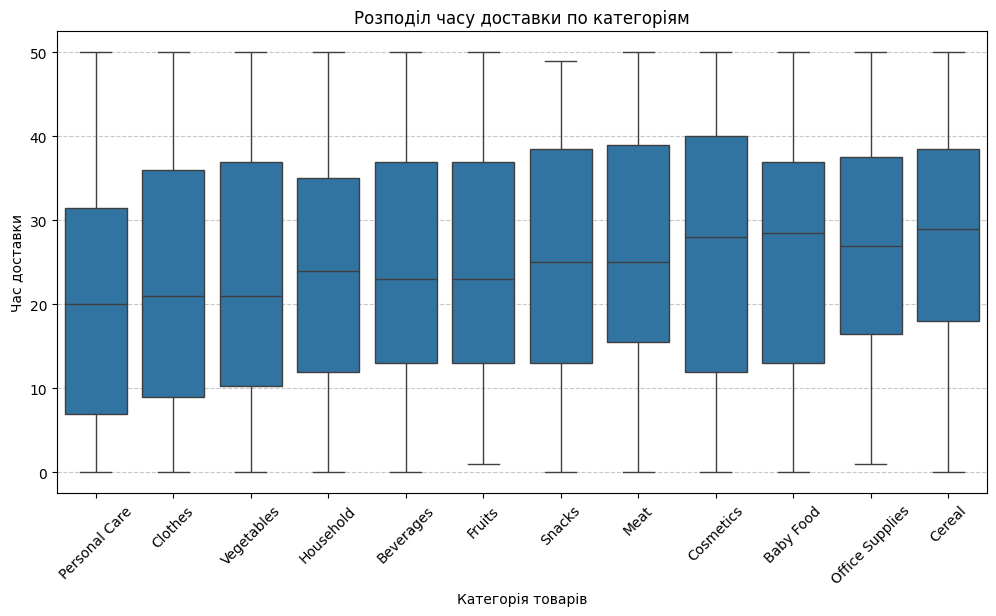

In [124]:
# –°–µ—Ä–µ–¥–Ω—ñ–π Shipping Time –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º
shipping_by_categoty = sales_df.groupby('Product Category')['Shipping Time'].mean() \
                        .sort_values(ascending=True).reset_index()


plt.figure(figsize=(12,5))
sns.barplot(data=shipping_by_categoty,
            x='Product Category',
            hue="Product Category",
            y='Shipping Time',
            palette='viridis',
            legend=False)
plt.title('–°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º')
plt.xlabel('–ö–∞—Ç–µ–≥–æ—Ä—ñ—è —Ç–æ–≤–∞—Ä—ñ–≤')
plt.ylabel('–ß–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


# –†–æ–∑–ø–æ–¥—ñ–ª —á–∞—Å—É –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º
plt.figure(figsize=(12,6))

order = sales_df.groupby('Product Category')['Shipping Time'].mean().sort_values().index

sns.boxplot(data=sales_df,
            x='Product Category',
            y='Shipping Time',
            order=order)
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª —á–∞—Å—É –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º')
plt.xlabel('–ö–∞—Ç–µ–≥–æ—Ä—ñ—è —Ç–æ–≤–∞—Ä—ñ–≤')
plt.ylabel('–ß–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

####*–ê–Ω–∞–ª—ñ–∑ –≤ —Ä–æ–∑—Ä—ñ–∑—ñ –∫—Ä–∞—ó–Ω*

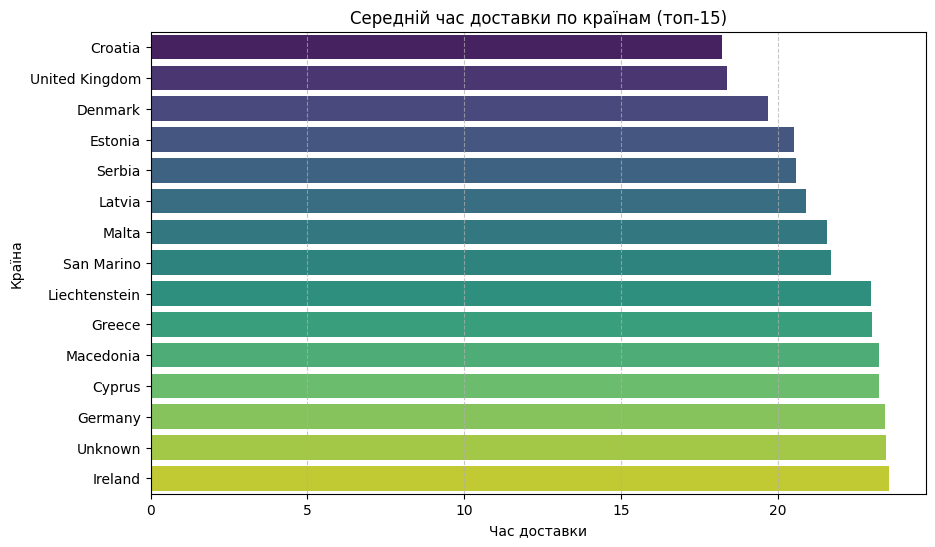

In [125]:
shipping_by_country = sales_df.groupby('Country')['Shipping Time'].mean().reset_index()

plt.figure(figsize=(10,6))
top_countries = shipping_by_country.sort_values("Shipping Time").head(15)
sns.barplot(data=top_countries,
            x='Shipping Time',
            hue='Country',
            y='Country',
            palette='viridis',
            legend=False)
plt.title('–°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ –∫—Ä–∞—ó–Ω–∞–º (—Ç–æ–ø-15)')
plt.xlabel('–ß–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏')
plt.ylabel('–ö—Ä–∞—ó–Ω–∞')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


####*–ê–Ω–∞–ª—ñ–∑ –≤ —Ä–æ–∑—Ä—ñ–∑—ñ —Ä–µ–≥—ñ–æ–Ω—ñ–≤*

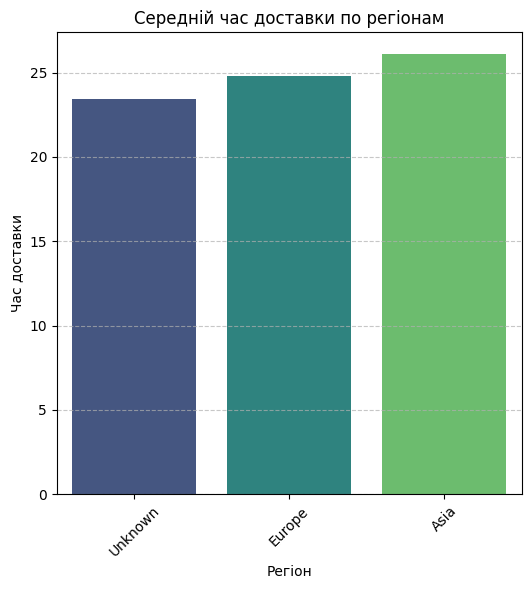

In [126]:
shipping_by_region = sales_df.groupby("Region")["Shipping Time"].mean() \
                      .sort_values(ascending=True).reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data=shipping_by_region,
            x="Region",
            hue='Region',
            y="Shipping Time",
            palette="viridis",
            legend=False)
plt.title("–°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ —Ä–µ–≥—ñ–æ–Ω–∞–º")
plt.xlabel('–†–µ–≥—ñ–æ–Ω')
plt.ylabel('–ß–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


####*–ê–Ω–∞–ª—ñ–∑ –∑–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ –ø—Ä–∏–±—É—Ç–æ–∫ –≤—ñ–¥ —á–∞—Å—É, –Ω–µ–æ–±—Ö—ñ–¥–Ω–æ–≥–æ –Ω–∞ –≤—ñ–¥–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è —Ç–æ–≤–∞—Ä—É*

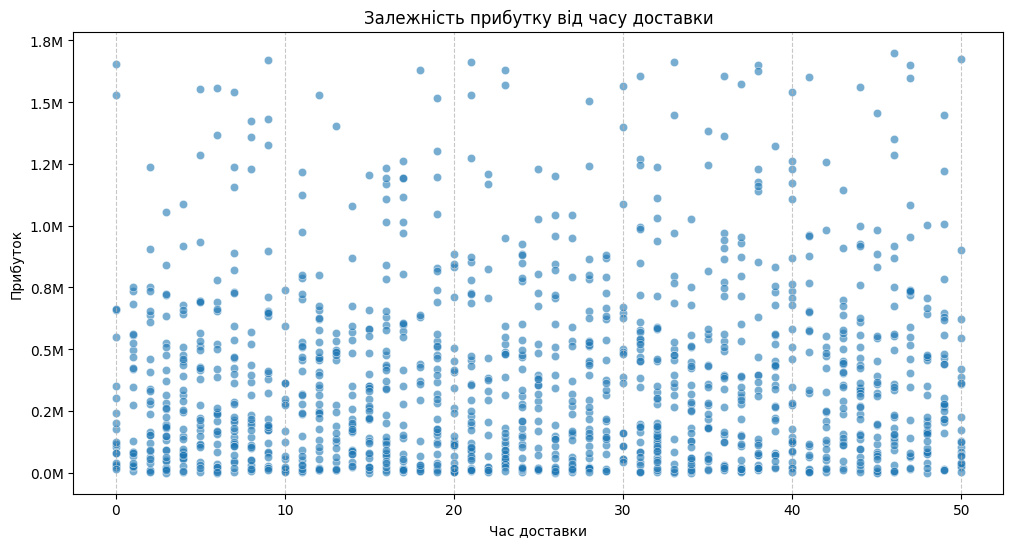

–ö–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ Shipping Time —Ç–∞ Profit: 0.061


In [127]:
# —á–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏ vs –ø—Ä–∏–±—É—Ç–æ–∫
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=sales_df, x="Shipping Time", y="Profit", alpha=0.6)
plt.title("–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –ø—Ä–∏–±—É—Ç–∫—É –≤—ñ–¥ —á–∞—Å—É –¥–æ—Å—Ç–∞–≤–∫–∏")
plt.xlabel('–ß–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏')
plt.ylabel('–ü—Ä–∏–±—É—Ç–æ–∫')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# –∫–æ—Ä–µ–ª—è—Ü—ñ—è
corr = sales_df["Shipping Time"].corr(sales_df["Profit"])
print(f"–ö–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ Shipping Time —Ç–∞ Profit: {corr:.3f}")


##**–í–∏—Å–Ω–æ–≤–∫–∏**
 ***1. –ß–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ –∫—Ä–∞—ó–Ω–∞—Ö***
- –ù–∞–π—à–≤–∏–¥—à—ñ –ø–æ—Å—Ç–∞–≤–∫–∏ —Å–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—é—Ç—å—Å—è —É —Ç–∞–∫–∏—Ö –∫—Ä–∞—ó–Ω–∞—Ö, —è–∫ –•–æ—Ä–≤–∞—Ç—ñ—è, –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω—ñ—è, –î–∞–Ω—ñ—è, –ï—Å—Ç–æ–Ω—ñ—è, –°–µ—Ä–±—ñ—è, –õ–∞—Ç–≤—ñ—è - —É —Å–µ—Ä–µ–¥–Ω—å–æ–º—É 18 - 21 –¥–Ω—ñ–≤.
- –¢—Ä–æ—Ö–∏ –¥–æ–≤—à–µ –¥–æ—Å—Ç–∞–≤–ª—è—é—Ç—å –≤ ‚Äî –Ü—Ä–ª–∞–Ω–¥—ñ—è, –ù—ñ–º–µ—á—á–∏–Ω–∞, –ö—ñ–ø—Ä, –ú–∞–∫–µ–¥–æ–Ω—ñ—è, –ì—Ä–µ—Ü—ñ—è - —É —Å–µ—Ä–µ–¥–Ω—å–æ–º—É 22‚Äì24 –¥–Ω—ñ.
- –ö—Ä–∞—ó–Ω–∏ –ó–∞—Ö—ñ–¥–Ω–æ—ó –Ñ–≤—Ä–æ–ø–∏ –º–∞—é—Ç—å –±—ñ–ª—å—à–∏–π —Å–µ—Ä–µ–¥–Ω—ñ–π —Ç–µ—Ä–º—ñ–Ω –¥–æ—Å—Ç–∞–≤–∫–∏, –Ω—ñ–∂ –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–∞/–ü—ñ–≤–¥–µ–Ω–Ω–∞ –Ñ–≤—Ä–æ–ø–∞. –¶–µ –º–æ–∂–µ –±—É—Ç–∏ –ø–æ–≤‚Äô—è–∑–∞–Ω–æ –∑ –≤—ñ–¥–¥–∞–ª–µ–Ω—ñ—Å—Ç—é —Å–∫–ª–∞–¥—ñ–≤, –ª–æ–≥—ñ—Å—Ç–∏—á–Ω–∏–º–∏ –º–∞—Ä—à—Ä—É—Ç–∞–º–∏ –∞–±–æ –º–∏—Ç–Ω–∏–º–∏ –ø—Ä–æ—Ü–µ–¥—É—Ä–∞–º–∏.

***2. –ß–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º —Ç–æ–≤–∞—Ä—ñ–≤***
- "–ù–∞–π—à–≤–∏–¥—à—ñ" –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó: Personal Care - 21 –¥–µ–Ω—å, Clothes - 23 –¥–Ω—ñ, Vegetables 23.5 –¥–Ω—ñ.
- "–ù–∞–π–ø–æ–≤—ñ–ª—å–Ω—ñ—à—ñ" –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó: Cereal, Office Supplies, Baby Food - 26 -27 –¥–Ω—ñ–≤.
- Boxplot –ø–æ–∫–∞–∑—É—î, —â–æ –≤ –º–µ–∂–∞—Ö –æ–¥–Ω—ñ—î—ó –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó —î –≤–µ–ª–∏–∫–∞ –≤–∞—Ä—ñ–∞—Ç–∏–≤–Ω—ñ—Å—Ç—å –≤—ñ–¥ –¥–æ—Å—Ç–∞–≤–∫–∏ –≤ –¥–µ–Ω—å –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è –¥–æ 50-—Ç–∏ –¥–Ω—ñ–≤.
- –û—Ç–∂–µ —Ç–æ–≤–∞—Ä–∏ –ø–æ–≤—Å—è–∫–¥–µ–Ω–Ω–æ–≥–æ –≤–∂–∏—Ç–∫—É —Ç–∞ —à–≤–∏–¥–∫–æ–ø—Å—É–≤–Ω—ñ –ø—Ä–æ–¥—É–∫—Ç–∏ (–æ–≤–æ—á—ñ, –æ–¥—è–≥, –∑–∞—Å–æ–±–∏ –≥—ñ–≥—ñ—î–Ω–∏) –¥–æ—Å—Ç–∞–≤–ª—è—é—Ç—å—Å—è —à–≤–∏–¥—à–µ, —Ç–æ–¥—ñ —è–∫ –Ω–µ—Ö–∞—Ä—á–æ–≤—ñ —Ç–∞ –¥–æ–≤–≥–æ—Ç—Ä–∏–≤–∞–ª—ñ —Ç–æ–≤–∞—Ä–∏ (–æ—Ñ—ñ—Å–Ω—ñ, –∫—Ä—É–ø–∏, –¥–∏—Ç—è—á–µ —Ö–∞—Ä—á—É–≤–∞–Ω–Ω—è) –º–∞—é—Ç—å –¥–æ–≤—à–∏–π —Ü–∏–∫–ª –ø–æ—Å—Ç–∞–≤–∫–∏.

***3. –ß–∞—Å –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ —Ä–µ–≥—ñ–æ–Ω–∞–º***
- –Ñ–≤—Ä–æ–ø–∞ ‚Äì —Å–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –±–ª–∏–∑—å–∫–æ 25 –¥–Ω—ñ–≤.
- –ê–∑—ñ—è ‚Äì —Ç—Ä–æ—Ö–∏ –±—ñ–ª—å—à–µ 26 –¥–Ω—ñ–≤.
- –û—Ç–∂–µ –≥–µ–æ–≥—Ä–∞—Ñ—ñ—á–Ω–∏–π —Ñ–∞–∫—Ç–æ—Ä –≤–∞–∂–ª–∏–≤–∏–π ‚Äî —á–∏–º –¥–∞–ª—ñ –≤—ñ–¥ —Å–∫–ª–∞–¥—É (—ñ–º–æ–≤—ñ—Ä–Ω–æ –Ñ–≤—Ä–æ–ø–∞), —Ç–∏–º –¥–æ–≤—à–µ —Ç—Ä–∏–≤–∞—î –¥–æ—Å—Ç–∞–≤–∫–∞.

***4. –ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –ø—Ä–∏–±—É—Ç–∫—É –≤—ñ–¥ —á–∞—Å—É –¥–æ—Å—Ç–∞–≤–∫–∏***
- Scatter plot –ø–æ–∫–∞–∑—É—î —à–∏—Ä–æ–∫–∏–π —Ä–æ–∑–∫–∏–¥: —î –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è –∑ –≤–∏—Å–æ–∫–∏–º –ø—Ä–∏–±—É—Ç–∫–æ–º —è–∫ –ø—Ä–∏ –¥—É–∂–µ —à–≤–∏–¥–∫—ñ–π –¥–æ—Å—Ç–∞–≤—Ü—ñ 0‚Äì5 –¥–Ω—ñ–≤, —Ç–∞–∫ —ñ –ø—Ä–∏ –¥–æ–≤–≥–æ—Ç—Ä–∏–≤–∞–ª—ñ–π >40 –¥–Ω—ñ–≤.
- –ü–æ–∫–∞–∑–Ω–∏–∫ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó 0.061 - —Ç–æ–∂ —Ñ–∞–∫—Ç–∏—á–Ω–æ –ª—ñ–Ω—ñ–π–Ω–æ—ó –∑–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ –º—ñ–∂ –ø—Ä–∏–±—É—Ç–∫–æ–º —ñ —á–∞—Å–æ–º –¥–æ—Å—Ç–∞–≤–∫–∏ –Ω–µ–º–∞—î.



###**–ê–Ω–∞–ª—ñ–∑ –¥–∏–Ω–∞–º—ñ–∫–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤ (—É —á–∞—Å—ñ)**


In [128]:
sales_df.head(2)

Order ID  Order Date Sales Channel  Units Sold  Unit Price  Unit Cost  \
0  100640618  2014-10-08        Online       650.0       205.7     117.11   
1  100983083  2016-08-11       Offline      1993.0       205.7     117.11   

    Revenue       Cost     Profit  Markup  Shipping Time Order DayName  \
0  133705.0   76121.50   57583.50    75.6             10     Wednesday   
1  409960.1  233400.23  176559.87    75.6              0      Thursday   

  YearQuarter Product Category Country  Region  
0     2014-Q4           Cereal  Norway  Europe  
1     2016-Q3           Cereal  Serbia  Europe

####*–ó–∞–≥–∞–ª—å–Ω–∞ –¥–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤*

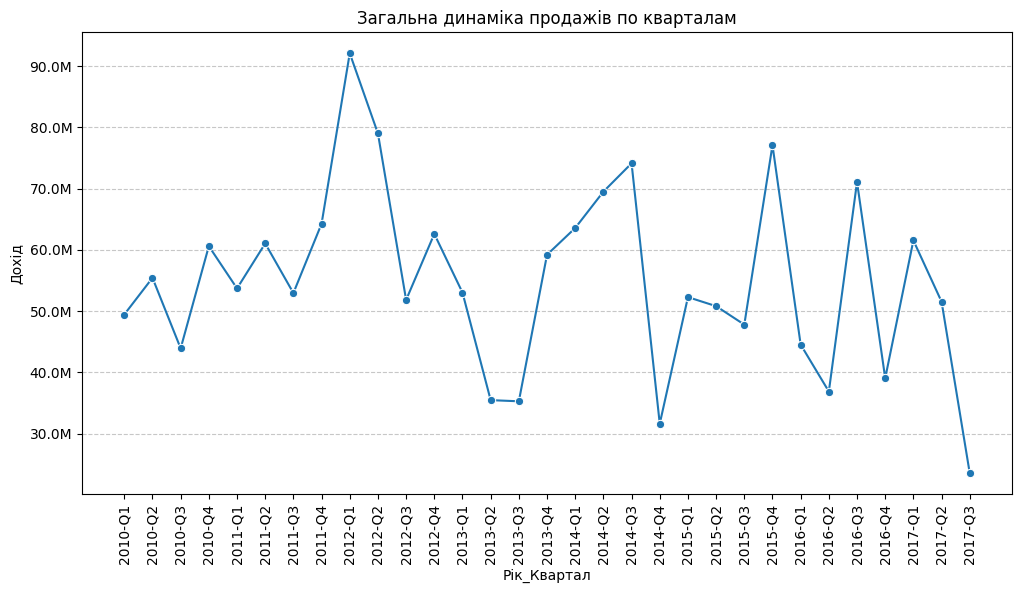

In [129]:
# –ó–∞–≥–∞–ª—å–Ω–∞ –¥–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤
category_trend = (sales_df
                  .groupby(['YearQuarter'])['Revenue']
                  .sum()
                  .reset_index())

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=category_trend,
             x='YearQuarter', y='Revenue', marker='o')
plt.title('–ó–∞–≥–∞–ª—å–Ω–∞ –¥–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ –∫–≤–∞—Ä—Ç–∞–ª–∞–º')
plt.xlabel('–†—ñ–∫_–ö–≤–∞—Ä—Ç–∞–ª')
plt.ylabel('–î–æ—Ö—ñ–¥')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()



####*–î–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ —É —Ä–æ–∑—Ä—ñ–∑—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤*

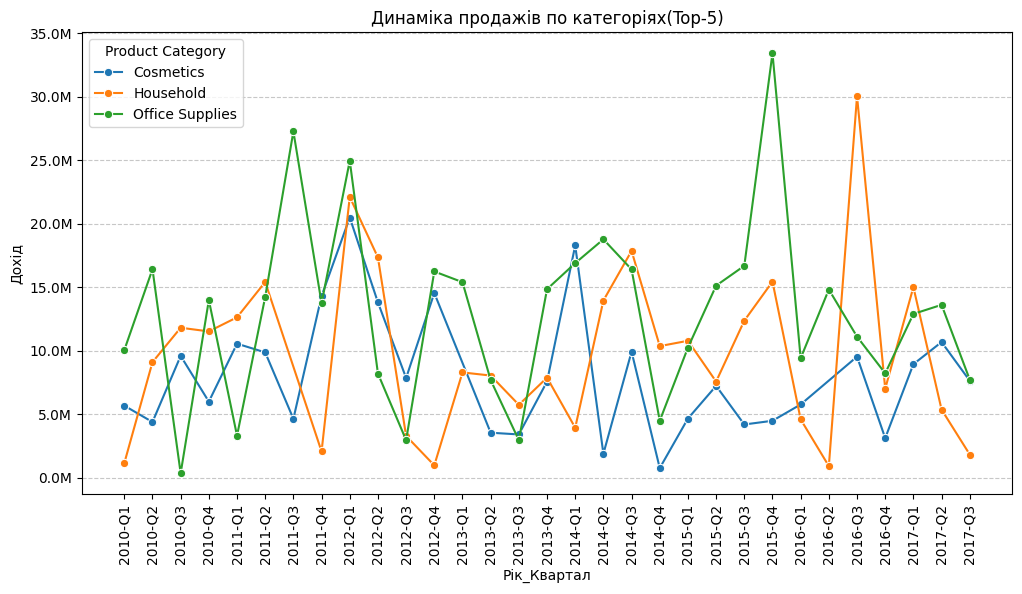

In [130]:
category_trend = (sales_df
                  .groupby(['YearQuarter', 'Product Category'])['Revenue']
                  .sum()
                  .reset_index())

top_category = (sales_df.groupby('Product Category')['Revenue']
                 .sum().nlargest(3).index)

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=category_trend[category_trend['Product Category'].isin(top_category)],
             x='YearQuarter', y='Revenue',
             hue='Product Category', marker='o')
plt.title('–î–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö(Top-5)')
plt.xlabel('–†—ñ–∫_–ö–≤–∞—Ä—Ç–∞–ª')
plt.ylabel('–î–æ—Ö—ñ–¥')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


####*–î–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ —É —Ä–æ–∑—Ä—ñ–∑—ñ –∫—Ä–∞—ó–Ω*

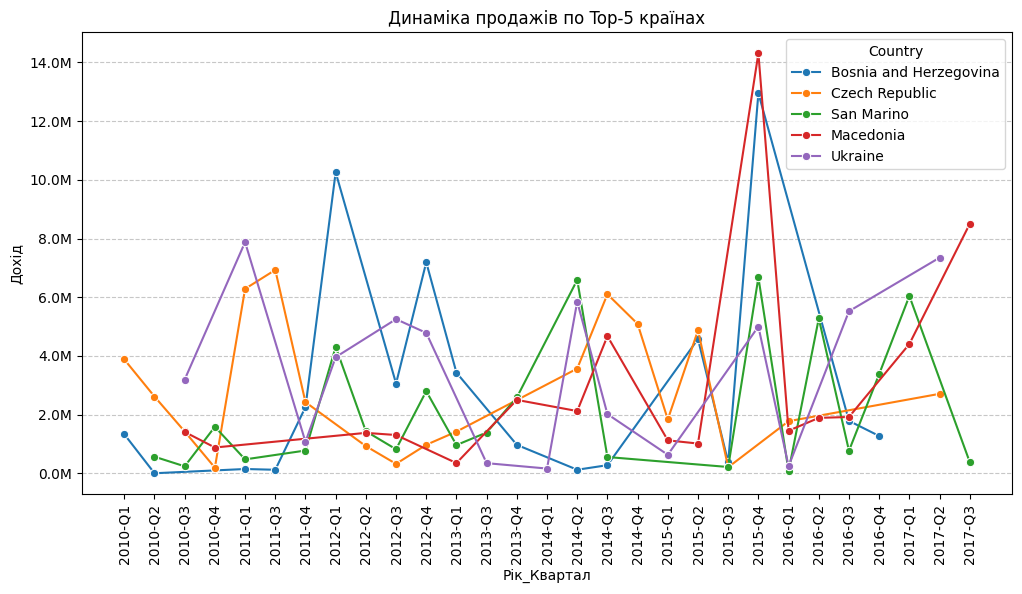

In [131]:
country_trend = (sales_df
                 .groupby(['YearQuarter', 'Country'])['Revenue']
                 .sum()
                 .reset_index())

top_countries = (sales_df[sales_df['Country'] != 'Unknown']
                 .groupby('Country')['Revenue']
                 .sum()
                 .nlargest(5)
                 .index)

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=country_trend[country_trend['Country'].isin(top_countries)],
             x='YearQuarter', y='Revenue',
             hue='Country', marker='o')
plt.title('–î–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ Top-5 –∫—Ä–∞—ó–Ω–∞—Ö')
plt.xlabel('–†—ñ–∫_–ö–≤–∞—Ä—Ç–∞–ª')
plt.ylabel('–î–æ—Ö—ñ–¥')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


####*–î–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ —É —Ä–æ–∑—Ä—ñ–∑—ñ —Ä–µ–≥—ñ–æ–Ω—ñ–≤*

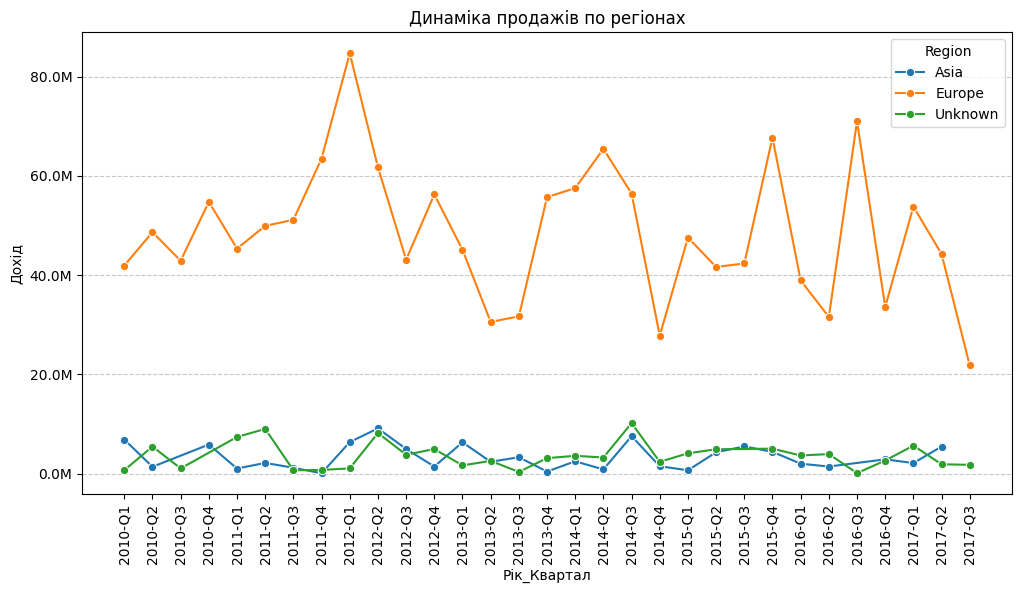

In [132]:
region_trend = (sales_df
                .groupby(['YearQuarter', 'Region'])['Revenue']
                .sum()
                .reset_index())

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=region_trend,
             x='YearQuarter', y='Revenue',
             hue='Region', marker='o')
plt.title('–î–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ —Ä–µ–≥—ñ–æ–Ω–∞—Ö')
plt.xlabel('–†—ñ–∫_–ö–≤–∞—Ä—Ç–∞–ª')
plt.ylabel('–î–æ—Ö—ñ–¥')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


##**–í–∏—Å–Ω–æ–≤–∫–∏**
***1. –ó–∞–≥–∞–ª—å–Ω–∞ –¥–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ –∫–≤–∞—Ä—Ç–∞–ª–∞—Ö***
- –í–∏—Ä—É—á–∫–∞ –∫–æ–ª–∏–≤–∞–ª–∞—Å—è –≤—ñ–¥ 30M –¥–æ 90M.
- –Ñ –ø–µ—Ä—ñ–æ–¥–∏ —Ä—ñ–∑–∫–æ–≥–æ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è: –ø—ñ–∫ —É 2012Q2‚Äì2012Q3 –ø–æ–Ω–∞–¥ 90M.
- –î–∞–ª—ñ –π–¥–µ –ø–∞–¥—ñ–Ω–Ω—è, –æ—Å–æ–±–ª–∏–≤–æ —É 2013Q2‚ÄìQ3, –∫–æ–ª–∏ –≤–∏—Ä—É—á–∫–∞ –æ–ø—É—Å—Ç–∏–ª–∞—Å—è –Ω–∏–∂—á–µ 40M.
- –£ 2014‚Äì2015 –≤—ñ–¥–Ω–æ–≤–ª–µ–Ω–Ω—è, –∞–ª–µ –ø—ñ—Å–ª—è 2015 —Ä–æ–∫—É –±–∞—á–∏–º–æ –Ω–µ—Å—Ç–∞–±—ñ–ª—å–Ω—ñ—Å—Ç—å —ñ –ø–æ—Å—Ç—É–ø–æ–≤–∏–π —Å–ø–∞–¥.

***2. –î–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö (–¢–û–ü-3)***
- Office Supplies ‚Äî –Ω–∞–π–±—ñ–ª—å—à—ñ –∫–æ–ª–∏–≤–∞–Ω–Ω—è, —É –¥–µ—è–∫—ñ –∫–≤–∞—Ä—Ç–∞–ª–∏ –¥–æ—Ö–æ–¥–∏–ª–∏ –¥–æ 30M+. –ú–∞—î ¬´–ø—ñ–∫–æ–≤—ñ¬ª –ø—Ä–æ–¥–∞–∂—ñ, –∞–ª–µ –Ω–µ—Å—Ç–∞–±—ñ–ª—å–Ω—ñ - –º–æ–∂–ª–∏–≤–æ, –ø—Ä–æ–¥–∞–∂—ñ –∑–∞–ª–µ–∂–∞—Ç—å –≤—ñ–¥ –≤–µ–ª–∏–∫–∏—Ö –æ–¥–Ω–æ—Ä–∞–∑–æ–≤–∏—Ö –∫–æ–Ω—Ç—Ä–∞–∫—Ç—ñ–≤.
- Household ‚Äî –±—ñ–ª—å—à —Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω–∏–π —Ç—Ä–µ–Ω–¥, –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è —É 2011‚Äì2012, –¥–∞–ª—ñ –ø–∞–¥—ñ–Ω–Ω—è, –ø–æ—Ç—ñ–º –∑–Ω–æ–≤—É –ø—ñ–¥–π–æ–º–∏ —É 2014‚Äì2016.
- Cosmetics ‚Äî —Å—Ç–∞–±—ñ–ª—å–Ω–æ –Ω–∏–∂—á—ñ –∑–∞ –¥–≤—ñ —ñ–Ω—à—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó, –∞–ª–µ –∑ –≤—ñ–¥–Ω–æ—Å–Ω–æ –ø–ª–∞–≤–Ω–æ—é –¥–∏–Ω–∞–º—ñ–∫–æ—é.

***3. –î–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ –∫—Ä–∞—ó–Ω–∞—Ö (–¢–û–ü-5)***
- –£–∫—Ä–∞—ó–Ω–∞ ‚Äî –ø–æ–∫–∞–∑—É—î –ø–æ—Å—Ç—É–ø–æ–≤–µ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è –ø—ñ—Å–ª—è 2014 —Ä–æ–∫—É, –≤–∏—Ö–æ–¥—è—á–∏ —É –¢–û–ü.
- –ë–æ—Å–Ω—ñ—è —ñ –ì–µ—Ä—Ü–µ–≥–æ–≤–∏–Ω–∞ ‚Äî –≤–∏—Å–æ–∫—ñ –ø—ñ–∫–∏ —É 2012 —ñ 2015 —Ä–æ–∫–∞—Ö, –∞–ª–µ –Ω–µ—Å—Ç–∞–±—ñ–ª—å–Ω–æ.
- –ß–µ—Ö—ñ—è ‚Äî —Å—Ç–∞–±—ñ–ª—å–Ω—ñ —Å–µ—Ä–µ–¥–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ –±–µ–∑ —Ä—ñ–∑–∫–∏—Ö –ø—Ä–æ–≤–∞–ª—ñ–≤.
- –ú–∞–∫–µ–¥–æ–Ω—ñ—è ‚Äî —Ä—ñ–∑–∫–∏–π —Å—Ç—Ä–∏–±–æ–∫ —É 2015 —Ä–æ—Ü—ñ (–ø–æ–Ω–∞–¥ 14M), –¥–∞–ª—ñ –Ω–∏–∂—á–µ.
- –°–∞–Ω-–ú–∞—Ä–∏–Ω–æ ‚Äî —Ç–µ–∂ –º–∞—î —Ä—ñ–∑–∫—ñ –ø—ñ–∫–∏, –∞–ª–µ –Ω–µ —î —Å—Ç–∞–±—ñ–ª—å–Ω–∏–º –¥—Ä–∞–π–≤–µ—Ä–æ–º.

***4. –î–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ —Ä–µ–≥—ñ–æ–Ω–∞—Ö***
- –Ñ–≤—Ä–æ–ø–∞ ‚Äî –±–µ–∑—É–º–æ–≤–Ω–∏–π –ª—ñ–¥–µ—Ä, —Å—Ç–∞–±—ñ–ª—å–Ω–æ 40‚Äì80M, –ø—ñ–∫–∏ –≤ 2012 —ñ 2016 —Ä–æ–∫–∞—Ö.
- –ê–∑—ñ—è ‚Äî –∑–Ω–∞—á–Ω–æ –º–µ–Ω—à—ñ –æ–±—Å—è–≥–∏, –∑–¥–µ–±—ñ–ª—å—à–æ–≥–æ –¥–æ 5‚Äì10M, –±–µ–∑ —è–≤–Ω–æ–≥–æ —Ä–æ—Å—Ç—É.


###**–ê–Ω–∞–ª—ñ–∑ –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ –¥–Ω—è–º–∏ —Ç–∏–∂–Ω—è**

In [133]:
sales_df.head(2)

Order ID  Order Date Sales Channel  Units Sold  Unit Price  Unit Cost  \
0  100640618  2014-10-08        Online       650.0       205.7     117.11   
1  100983083  2016-08-11       Offline      1993.0       205.7     117.11   

    Revenue       Cost     Profit  Markup  Shipping Time Order DayName  \
0  133705.0   76121.50   57583.50    75.6             10     Wednesday   
1  409960.1  233400.23  176559.87    75.6              0      Thursday   

  YearQuarter Product Category Country  Region  
0     2014-Q4           Cereal  Norway  Europe  
1     2016-Q3           Cereal  Serbia  Europe

####*–ó–∞–≥–∞–ª—å–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –ø–æ –¥–Ω—è–º*

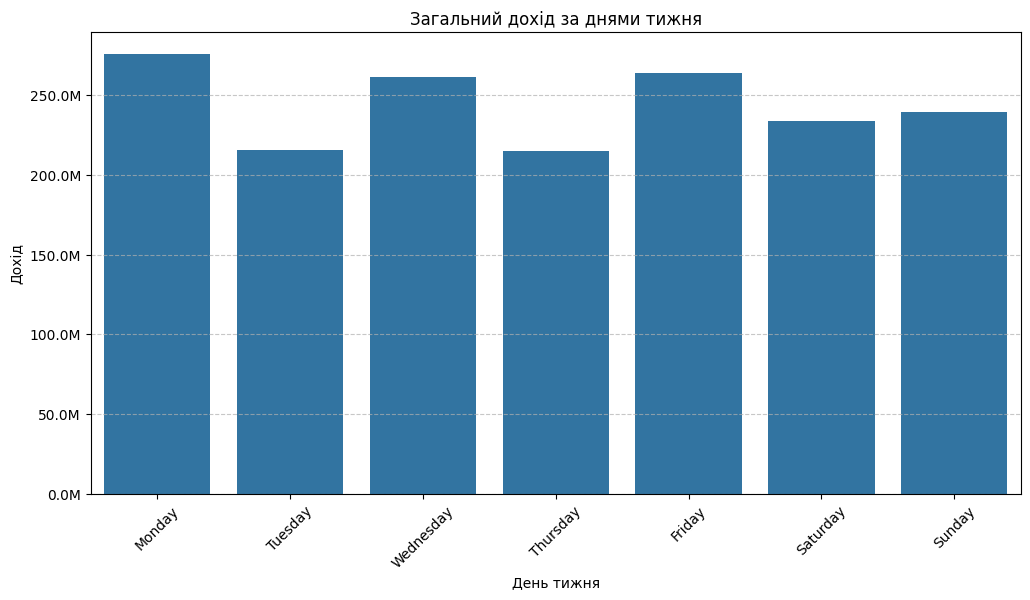

In [134]:
revenue_by_day = sales_df.groupby('Order DayName')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=revenue_by_day.index,
            y=revenue_by_day.values)
plt.title("–ó–∞–≥–∞–ª—å–Ω–∏–π –¥–æ—Ö—ñ–¥ –∑–∞ –¥–Ω—è–º–∏ —Ç–∏–∂–Ω—è")
plt.ylabel("–î–æ—Ö—ñ–¥")
plt.xlabel("–î–µ–Ω—å —Ç–∏–∂–Ω—è")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


####*–ê–Ω–∞–ª—ñ–∑ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ –¥–Ω—è–º –≤ —Ä–æ–∑—Ä—ñ–∑—ñ —Ç–æ–ø 5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π*

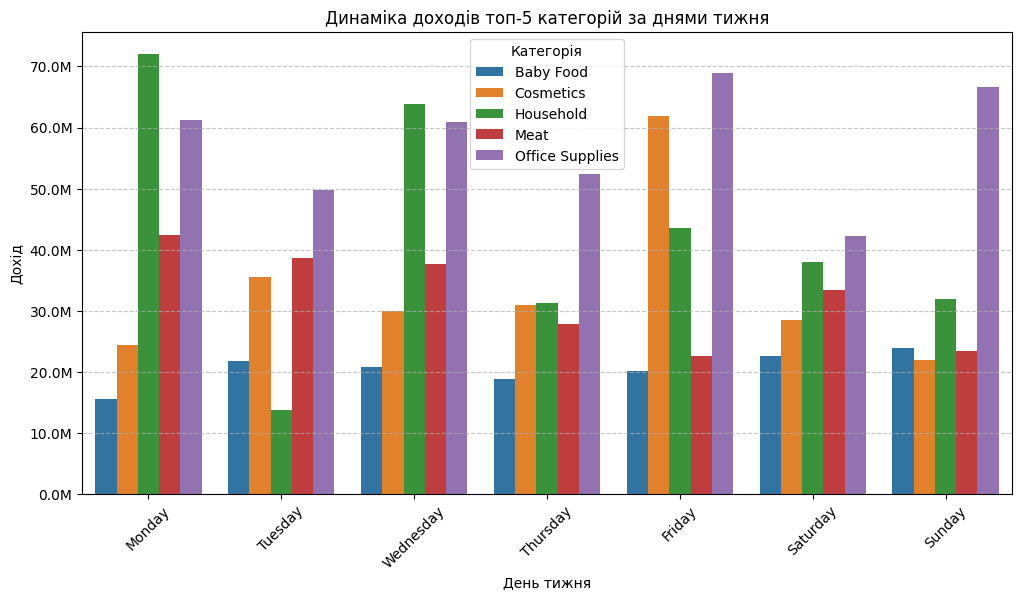

In [135]:

# —Ç–æ–ø-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –∑–∞ –¥–æ—Ö–æ–¥–æ–º
top5_categories = (
    sales_df.groupby('Product Category')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# –∞–Ω–∞–ª—ñ–∑ —Ç–æ–ø-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –∑–∞ –¥–Ω—è–º–∏ —Ç–∏–∂–Ω—è
top5_data = sales_df[sales_df['Product Category'].isin(top5_categories)]

category_day_sales = (
    top5_data.groupby(['Order DayName', 'Product Category'])['Revenue']
    .sum()
    .reset_index()
)

# –≤–ø–æ—Ä—è–¥–∫–æ–≤—É—î–º–æ –¥–Ω—ñ —Ç–∏–∂–Ω—è
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
category_day_sales['Order DayName'] = pd.Categorical(category_day_sales['Order DayName'], categories=day_order, ordered=True)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=category_day_sales,
    x='Order DayName',
    y='Revenue',
    hue='Product Category'
)
plt.title("–î–∏–Ω–∞–º—ñ–∫–∞ –¥–æ—Ö–æ–¥—ñ–≤ —Ç–æ–ø-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –∑–∞ –¥–Ω—è–º–∏ —Ç–∏–∂–Ω—è")
plt.ylabel("–î–æ—Ö—ñ–¥")
plt.xlabel("–î–µ–Ω—å —Ç–∏–∂–Ω—è")
plt.legend(title="–ö–∞—Ç–µ–≥–æ—Ä—ñ—è")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

##**–í–∏—Å–Ω–æ–≤–∫–∏**
***1. –ó–∞–≥–∞–ª—å–Ω–∏–π –¥–æ—Ö—ñ–¥ –∑–∞ –¥–Ω—è–º–∏ —Ç–∏–∂–Ω—è***
- –ù–∞–π–≤–∏—â—ñ –ø—Ä–æ–¥–∞–∂—ñ –ø—Ä–∏–ø–∞–¥–∞—é—Ç—å –Ω–∞ –ø–æ–Ω–µ–¥—ñ–ª–æ–∫ —Ç–∞ –ø‚Äô—è—Ç–Ω–∏—Ü—é ‚Äì –æ–±–∏–¥–≤–∞ –¥–Ω—ñ –º–∞—é—Ç—å –ø—ñ–∫ –¥–æ—Ö–æ–¥—ñ–≤ –ø–æ–Ω–∞–¥ 260M.
- –°—É–±–æ—Ç–∞ —Ç–∞ –Ω–µ–¥—ñ–ª—è ‚Äì –Ω–∞ —Å–µ—Ä–µ–¥–Ω—å–æ–º—É —Ä—ñ–≤–Ω—ñ, –±–ª–∏–∑—å–∫–æ 235‚Äì240M.
- –ù–∞–π—Å–ª–∞–±—à—ñ –¥–Ω—ñ ‚Äì –≤—ñ–≤—Ç–æ—Ä–æ–∫ —ñ —á–µ—Ç–≤–µ—Ä - –±—ñ–ª—è 215M - –º–æ–∂–ª–∏–≤–æ, –≤ —Ü—ñ –¥–Ω—ñ –≤–∞—Ä—Ç–æ –∑–∞—Å—Ç–æ—Å–æ–≤—É–≤–∞—Ç–∏ –∞–∫—Ü—ñ—ó —á–∏ —Å–ø–µ—Ü—ñ–∞–ª—å–Ω—ñ –ø—Ä–æ–ø–æ–∑–∏—Ü—ñ—ó –¥–ª—è –∞–∫—Ç–∏–≤—ñ–∑–∞—Ü—ñ—ó –ø–æ–ø–∏—Ç—É.

***2. –î–∏–Ω–∞–º—ñ–∫–∞ –¥–æ—Ö–æ–¥—ñ–≤ —Ç–æ–ø-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –∑–∞ –¥–Ω—è–º–∏ —Ç–∏–∂–Ω—è***
- Office Supplies —Å—Ç–∞–±—ñ–ª—å–Ω–æ —Å–∏–ª—å–Ω—ñ, –æ—Å–æ–±–ª–∏–≤–æ —É –ø‚Äô—è—Ç–Ω–∏—Ü—é —Ç–∞ –Ω–µ–¥—ñ–ª—é - –ø–æ–Ω–∞–¥ 65M. –¶–µ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –∑–∞–∫—É–ø—ñ–≤–ª—ñ –æ—Ñ—ñ—Å—ñ–≤ –ø–µ—Ä–µ–¥ –≤–∏—Ö—ñ–¥–Ω–∏–º–∏ —Ç–∞ –ø—ñ—Å–ª—è.
- Household –º–∞—î —è—Å–∫—Ä–∞–≤–∏–π –ø—ñ–∫ —É –ø–æ–Ω–µ–¥—ñ–ª–æ–∫ - 72M, –∞–ª–µ –∑–Ω–∞—á–Ω–æ –ø–∞–¥–∞—î —É –≤—ñ–≤—Ç–æ—Ä–æ–∫ - 14M. –¶–µ –¥—É–∂–µ –≤–∏—Ä–∞–∂–µ–Ω–∞ —Å–µ–∑–æ–Ω–Ω—ñ—Å—Ç—å —É –º–µ–∂–∞—Ö —Ç–∏–∂–Ω—è.
- Cosmetics –ø–æ—Å—Ç—É–ø–æ–≤–æ —Ä–æ—Å—Ç–µ, –∑ –ø—ñ–∫–æ–º —É –ø‚Äô—è—Ç–Ω–∏—Ü—é - 62M. –ô–º–æ–≤—ñ—Ä–Ω–æ, –∫—ñ–Ω–µ—Ü—å —Ç–∏–∂–Ω—è —Å—Ç–∏–º—É–ª—é—î –ø–æ–∫—É–ø–∫–∏ –¥–ª—è –æ—Å–æ–±–∏—Å—Ç–∏—Ö –ø–æ—Ç—Ä–µ–± –ø–µ—Ä–µ–¥ –≤–∏—Ö—ñ–¥–Ω–∏–º–∏.
- Meat –¥–æ—Å–∏—Ç—å —Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è, –∞–ª–µ —Å–ª–∞–±–∫–∞ —É –ø‚Äô—è—Ç–Ω–∏—Ü—é - 23M, –∑–∞—Ç–µ –∫—Ä–∞—â–∞ –Ω–∞ –ø–æ—á–∞—Ç–∫—É —Ç–∏–∂–Ω—è –≤ –ø–æ–Ω–µ–¥—ñ–ª–æ–∫ - 42M.
- Baby Food –±—ñ–ª—å—à —Å—Ç–∞–±—ñ–ª—å–Ω–∞, –±–µ–∑ —Å–∏–ª—å–Ω–∏—Ö —Å—Ç—Ä–∏–±–∫—ñ–≤: —Ç—Ä–∏–º–∞—î—Ç—å—Å—è –≤ –¥—ñ–∞–ø–∞–∑–æ–Ω—ñ 15‚Äì25M. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –ø–æ—Å—Ç—ñ–π–Ω–∏–π –ø–æ–ø–∏—Ç –Ω–µ–∑–∞–ª–µ–∂–Ω–æ –≤—ñ–¥ –¥–Ω—è.